In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from scipy.stats import pearsonr,chi2_contingency
from scipy import stats
from scipy.stats import zscore
from sklearn import preprocessing
from scipy.stats import spearmanr
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from scipy.stats import pearsonr,chi2_contingency
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder 
import re
from mpl_toolkits.mplot3d import Axes3D

In [50]:
df=pd.read_csv('Downloads/Dataset-Mental-Disorders.csv')


In [51]:
#checking for nulls
missedvalues=df.isnull().sum()
df.isnull().sum()


Patient Number         0
Sadness                0
Euphoric               0
Exhausted              0
Sleep dissorder        0
Mood Swing             0
Suicidal thoughts      0
Anorxia                0
Authority Respect      0
Try-Explanation        0
Aggressive Response    0
Ignore & Move-On       0
Nervous Break-down     0
Admit Mistakes         0
Overthinking           0
Sexual Activity        0
Concentration          0
Optimisim              0
Expert Diagnose        0
dtype: int64

In [52]:

#checking for duplicates

duplicatedValues=df.duplicated(subset='Patient Number')
print("Duplicated values",duplicatedValues)
df.duplicated().sum()



Duplicated values 0      False
1      False
2      False
3      False
4      False
       ...  
115    False
116    False
117    False
118    False
119    False
Length: 120, dtype: bool


0

In [53]:
df.drop(columns=['Patient Number'], inplace=True)
df.index += 1
df.index.name = 'Patient ID'
df

,Sadness,Euphoric,Exhausted,Sleep dissorder,Mood Swing,Suicidal thoughts,Anorxia,Authority Respect,Try-Explanation,Aggressive Response,Ignore & Move-On,Nervous Break-down,Admit Mistakes,Overthinking,Sexual Activity,Concentration,Optimisim,Expert Diagnose
Patient ID,,,,,,,,,,,,,,,,,,
1,Usually,Seldom,Sometimes,Sometimes,YES,YES,NO,NO,YES,NO,NO,YES,YES,YES,3 From 10,3 From 10,4 From 10,Bipolar Type-2
2,Usually,Seldom,Usually,Sometimes,NO,YES,NO,NO,NO,NO,NO,NO,NO,NO,4 From 10,2 From 10,5 From 10,Depression
3,Sometimes,Most-Often,Sometimes,Sometimes,YES,NO,NO,NO,YES,YES,NO,YES,YES,NO,6 From 10,5 From 10,7 From 10,Bipolar Type-1
4,Usually,Seldom,Usually,Most-Often,YES,YES,YES,NO,YES,NO,NO,NO,NO,NO,3 From 10,2 From 10,2 From 10,Bipolar Type-2
5,Usually,Usually,Sometimes,Sometimes,NO,NO,NO,NO,NO,NO,NO,YES,YES,YES,5 From 10,5 From 10,6 From 10,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,Most-Often,Seldom,Usually,Sometimes,NO,YES,NO,NO,YES,NO,YES,NO,NO,YES,2 From 10,5 From 10,3 From 10,Depression
117,Sometimes,Sometimes,Sometimes,Seldom,YES,NO,NO,NO,NO,YES,NO,NO,NO,YES,6 From 10,7 From 10,8 From 10,Bipolar Type-1
118,Usually,Sometimes,Usually,Sometimes,YES,NO,YES,YES,NO,NO,NO,YES,NO,YES,1 From 10,5 From 10,3 From 10,Bipolar Type-2


In [54]:
catg_col=['Mood Swing','Suicidal thoughts','Anorxia','Authority Respect','Try-Explanation','Aggressive Response','Ignore & Move-On','Admit Mistakes','Overthinking','Nervous Break-down']

label_encoder=preprocessing.LabelEncoder()
for column in catg_col:
    df[column]=label_encoder.fit_transform(df[column])
    
df


,Sadness,Euphoric,Exhausted,Sleep dissorder,Mood Swing,Suicidal thoughts,Anorxia,Authority Respect,Try-Explanation,Aggressive Response,Ignore & Move-On,Nervous Break-down,Admit Mistakes,Overthinking,Sexual Activity,Concentration,Optimisim,Expert Diagnose
Patient ID,,,,,,,,,,,,,,,,,,
1,Usually,Seldom,Sometimes,Sometimes,1,2,0,0,1,0,0,1,1,1,3 From 10,3 From 10,4 From 10,Bipolar Type-2
2,Usually,Seldom,Usually,Sometimes,0,1,0,0,0,0,0,0,0,0,4 From 10,2 From 10,5 From 10,Depression
3,Sometimes,Most-Often,Sometimes,Sometimes,1,0,0,0,1,1,0,1,1,0,6 From 10,5 From 10,7 From 10,Bipolar Type-1
4,Usually,Seldom,Usually,Most-Often,1,1,1,0,1,0,0,0,0,0,3 From 10,2 From 10,2 From 10,Bipolar Type-2
5,Usually,Usually,Sometimes,Sometimes,0,0,0,0,0,0,0,1,1,1,5 From 10,5 From 10,6 From 10,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,Most-Often,Seldom,Usually,Sometimes,0,1,0,0,1,0,1,0,0,1,2 From 10,5 From 10,3 From 10,Depression
117,Sometimes,Sometimes,Sometimes,Seldom,1,0,0,0,0,1,0,0,0,1,6 From 10,7 From 10,8 From 10,Bipolar Type-1
118,Usually,Sometimes,Usually,Sometimes,1,0,1,1,0,0,0,1,0,1,1 From 10,5 From 10,3 From 10,Bipolar Type-2


In [55]:
df['Sexual Activity'] = df['Sexual Activity'].astype(str)
df['Concentration'] = df['Concentration'].astype(str)
df['Optimisim'] = df['Optimisim'].astype(str)


In [56]:
#Extract first number using regex
df['Sexual Activity'] = df['Sexual Activity'].str.extract(r'(\d+)')
df['Concentration'] = df['Concentration'].str.extract(r'(\d+)')
df['Optimisim'] = df['Optimisim'].str.extract(r'(\d+)')

df



,Sadness,Euphoric,Exhausted,Sleep dissorder,Mood Swing,Suicidal thoughts,Anorxia,Authority Respect,Try-Explanation,Aggressive Response,Ignore & Move-On,Nervous Break-down,Admit Mistakes,Overthinking,Sexual Activity,Concentration,Optimisim,Expert Diagnose
Patient ID,,,,,,,,,,,,,,,,,,
1,Usually,Seldom,Sometimes,Sometimes,1,2,0,0,1,0,0,1,1,1,3,3,4,Bipolar Type-2
2,Usually,Seldom,Usually,Sometimes,0,1,0,0,0,0,0,0,0,0,4,2,5,Depression
3,Sometimes,Most-Often,Sometimes,Sometimes,1,0,0,0,1,1,0,1,1,0,6,5,7,Bipolar Type-1
4,Usually,Seldom,Usually,Most-Often,1,1,1,0,1,0,0,0,0,0,3,2,2,Bipolar Type-2
5,Usually,Usually,Sometimes,Sometimes,0,0,0,0,0,0,0,1,1,1,5,5,6,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,Most-Often,Seldom,Usually,Sometimes,0,1,0,0,1,0,1,0,0,1,2,5,3,Depression
117,Sometimes,Sometimes,Sometimes,Seldom,1,0,0,0,0,1,0,0,0,1,6,7,8,Bipolar Type-1
118,Usually,Sometimes,Usually,Sometimes,1,0,1,1,0,0,0,1,0,1,1,5,3,Bipolar Type-2


In [57]:
df['Sexual Activity'] = pd.to_numeric(df['Sexual Activity'])
df['Concentration'] = pd.to_numeric(df['Concentration'])
df['Optimisim'] = pd.to_numeric(df['Optimisim'])
df

,Sadness,Euphoric,Exhausted,Sleep dissorder,Mood Swing,Suicidal thoughts,Anorxia,Authority Respect,Try-Explanation,Aggressive Response,Ignore & Move-On,Nervous Break-down,Admit Mistakes,Overthinking,Sexual Activity,Concentration,Optimisim,Expert Diagnose
Patient ID,,,,,,,,,,,,,,,,,,
1,Usually,Seldom,Sometimes,Sometimes,1,2,0,0,1,0,0,1,1,1,3,3,4,Bipolar Type-2
2,Usually,Seldom,Usually,Sometimes,0,1,0,0,0,0,0,0,0,0,4,2,5,Depression
3,Sometimes,Most-Often,Sometimes,Sometimes,1,0,0,0,1,1,0,1,1,0,6,5,7,Bipolar Type-1
4,Usually,Seldom,Usually,Most-Often,1,1,1,0,1,0,0,0,0,0,3,2,2,Bipolar Type-2
5,Usually,Usually,Sometimes,Sometimes,0,0,0,0,0,0,0,1,1,1,5,5,6,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,Most-Often,Seldom,Usually,Sometimes,0,1,0,0,1,0,1,0,0,1,2,5,3,Depression
117,Sometimes,Sometimes,Sometimes,Seldom,1,0,0,0,0,1,0,0,0,1,6,7,8,Bipolar Type-1
118,Usually,Sometimes,Usually,Sometimes,1,0,1,1,0,0,0,1,0,1,1,5,3,Bipolar Type-2


In [58]:
sadness = {'Most-Often': 3, 'Usually': 2,'Sometimes': 1, 'Seldom': 0}
euphoric = {'Most-Often': 3, 'Usually': 2,'Sometimes': 1, 'Seldom': 0}
exhausted = {'Most-Often': 3, 'Usually': 2,'Sometimes': 1, 'Seldom': 0}
sleep_dissorder = {'Most-Often': 3, 'Usually': 2,'Sometimes': 1, 'Seldom': 0}
expert_diagnose = {'Normal': 5,'Bipolar Type-1':6,'Bipolar Type-2':7,'Depression': 8}

df





,Sadness,Euphoric,Exhausted,Sleep dissorder,Mood Swing,Suicidal thoughts,Anorxia,Authority Respect,Try-Explanation,Aggressive Response,Ignore & Move-On,Nervous Break-down,Admit Mistakes,Overthinking,Sexual Activity,Concentration,Optimisim,Expert Diagnose
Patient ID,,,,,,,,,,,,,,,,,,
1,Usually,Seldom,Sometimes,Sometimes,1,2,0,0,1,0,0,1,1,1,3,3,4,Bipolar Type-2
2,Usually,Seldom,Usually,Sometimes,0,1,0,0,0,0,0,0,0,0,4,2,5,Depression
3,Sometimes,Most-Often,Sometimes,Sometimes,1,0,0,0,1,1,0,1,1,0,6,5,7,Bipolar Type-1
4,Usually,Seldom,Usually,Most-Often,1,1,1,0,1,0,0,0,0,0,3,2,2,Bipolar Type-2
5,Usually,Usually,Sometimes,Sometimes,0,0,0,0,0,0,0,1,1,1,5,5,6,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,Most-Often,Seldom,Usually,Sometimes,0,1,0,0,1,0,1,0,0,1,2,5,3,Depression
117,Sometimes,Sometimes,Sometimes,Seldom,1,0,0,0,0,1,0,0,0,1,6,7,8,Bipolar Type-1
118,Usually,Sometimes,Usually,Sometimes,1,0,1,1,0,0,0,1,0,1,1,5,3,Bipolar Type-2


In [59]:

df['Sadness'] = df['Sadness'].replace(sadness)
df['Euphoric'] = df['Euphoric'].replace(euphoric)
df['Exhausted'] = df['Exhausted'].replace(exhausted)
df['Sleep dissorder'] = df['Sleep dissorder'].replace(sleep_dissorder)
df['Expert Diagnose'] = df['Expert Diagnose'].replace(expert_diagnose)

df




,Sadness,Euphoric,Exhausted,Sleep dissorder,Mood Swing,Suicidal thoughts,Anorxia,Authority Respect,Try-Explanation,Aggressive Response,Ignore & Move-On,Nervous Break-down,Admit Mistakes,Overthinking,Sexual Activity,Concentration,Optimisim,Expert Diagnose
Patient ID,,,,,,,,,,,,,,,,,,
1,2,0,1,1,1,2,0,0,1,0,0,1,1,1,3,3,4,7
2,2,0,2,1,0,1,0,0,0,0,0,0,0,0,4,2,5,8
3,1,3,1,1,1,0,0,0,1,1,0,1,1,0,6,5,7,6
4,2,0,2,3,1,1,1,0,1,0,0,0,0,0,3,2,2,7
5,2,2,1,1,0,0,0,0,0,0,0,1,1,1,5,5,6,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,3,0,2,1,0,1,0,0,1,0,1,0,0,1,2,5,3,8
117,1,1,1,0,1,0,0,0,0,1,0,0,0,1,6,7,8,6
118,2,1,2,1,1,0,1,1,0,0,0,1,0,1,1,5,3,7


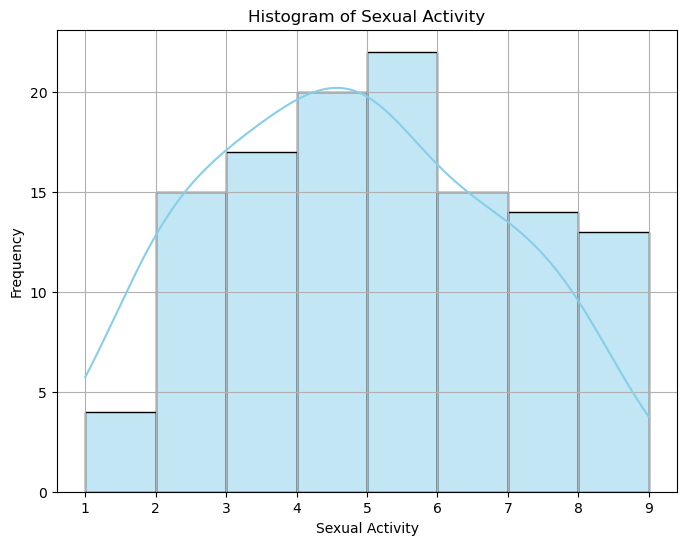

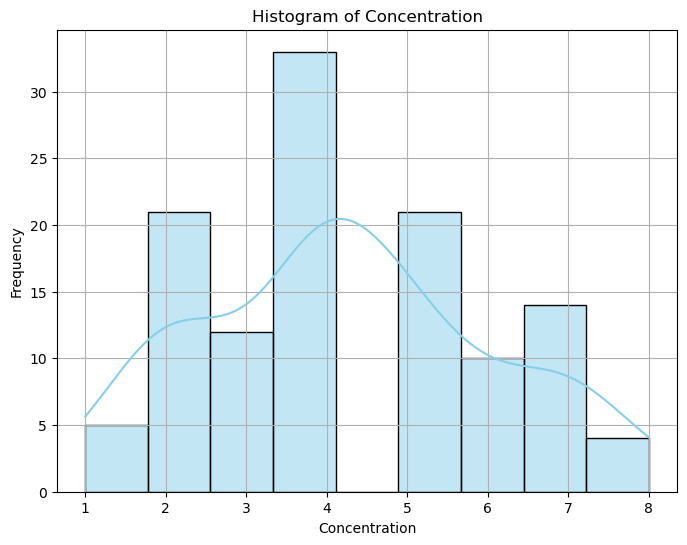

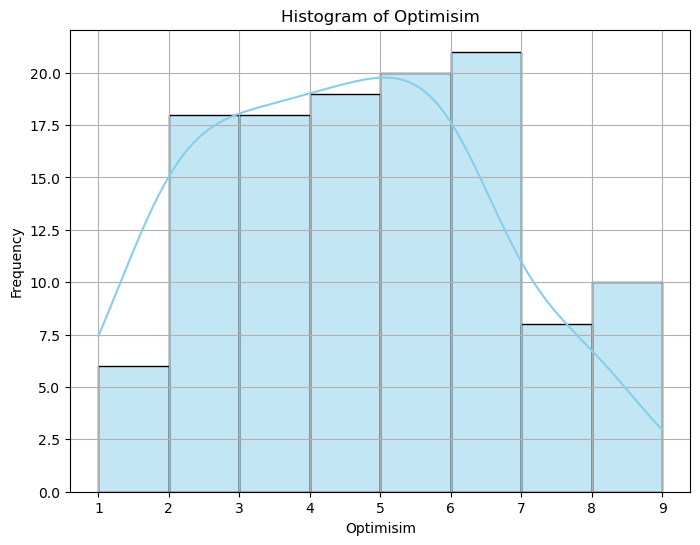

In [60]:
cols = ['Sexual Activity', 'Concentration', 'Optimisim']

# Plot histograms
for col in cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[col], kde=True, color='skyblue')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()





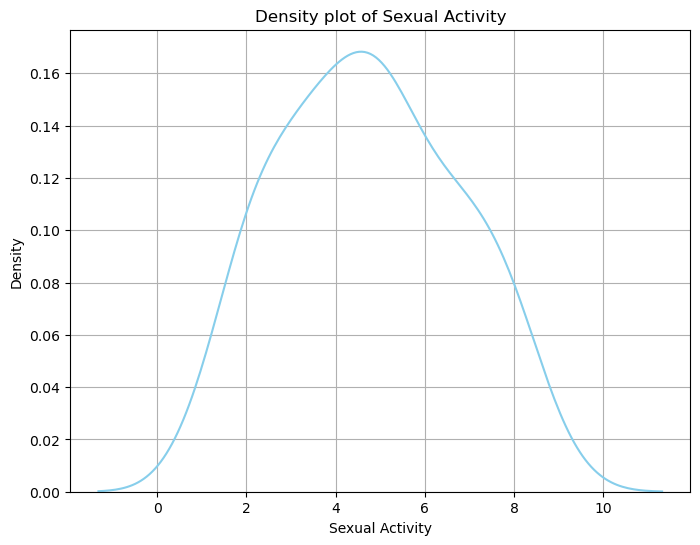

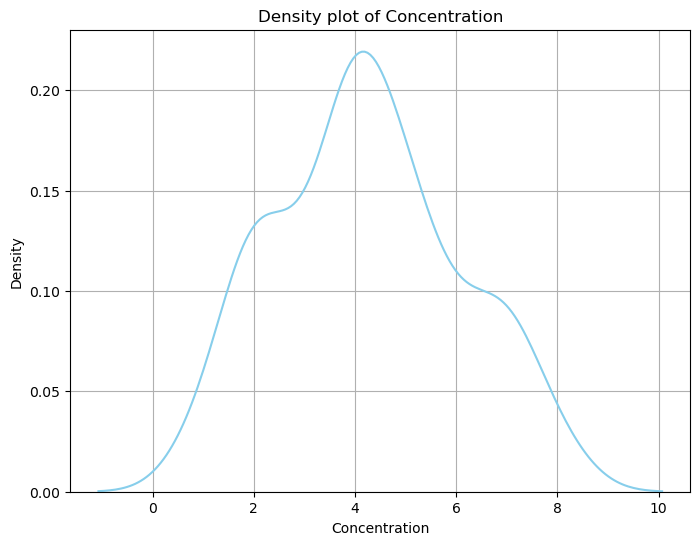

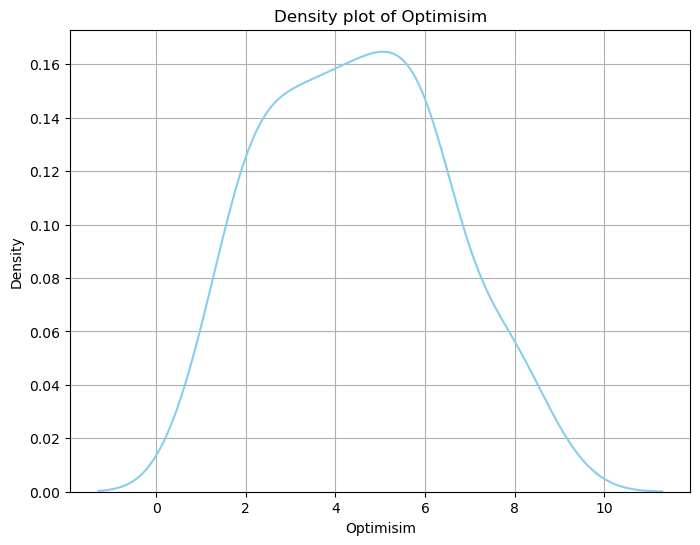

In [61]:
# Plot density plots
for col in cols:
    plt.figure(figsize=(8, 6))
    sns.kdeplot(df[col], color='skyblue')
    plt.title(f'Density plot of {col}')
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.grid(True)
    plt.show()

In [62]:
df.describe()

,Sadness,Euphoric,Exhausted,Sleep dissorder,Mood Swing,Suicidal thoughts,Anorxia,Authority Respect,Try-Explanation,Aggressive Response,Ignore & Move-On,Nervous Break-down,Admit Mistakes,Overthinking,Sexual Activity,Concentration,Optimisim,Expert Diagnose
count,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000
mean,1.550000,0.933333,1.633333,1.458333,0.475000,0.483333,0.383333,0.391667,0.475000,0.483333,0.416667,0.516667,0.491667,0.541667,4.741667,4.250000,4.466667,6.525000
std,0.924458,0.923396,1.020243,0.977871,0.501468,0.518293,0.488237,0.490169,0.501468,0.501817,0.495074,0.501817,0.502027,0.500350,2.010459,1.797524,1.991298,1.129903
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,5.000000
25%,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,3.000000,3.000000,5.750000
50%,2.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,5.000000,4.000000,4.000000,7.000000
75%,2.000000,1.000000,2.250000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,5.000000,6.000000,8.000000
max,3.000000,3.000000,3.000000,3.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,9.000000,8.000000,9.000000,8.000000


C:\Users\noran\AppData\Local\Temp\ipykernel_11088\1214276953.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Sexual Activity'])


<Axes: xlabel='Sexual Activity', ylabel='Density'>

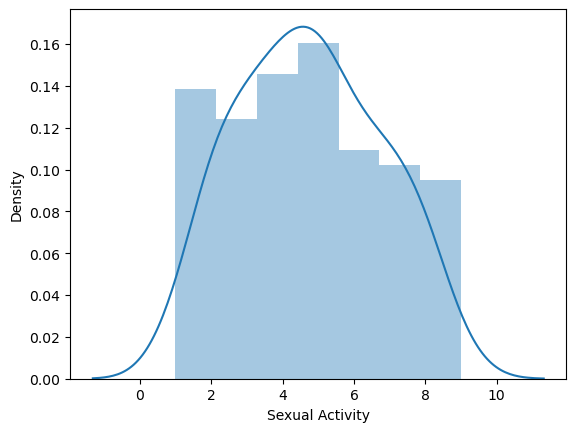

In [63]:
sns.distplot(df['Sexual Activity'])


C:\Users\noran\AppData\Local\Temp\ipykernel_11088\303052713.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Concentration'])


<Axes: xlabel='Concentration', ylabel='Density'>

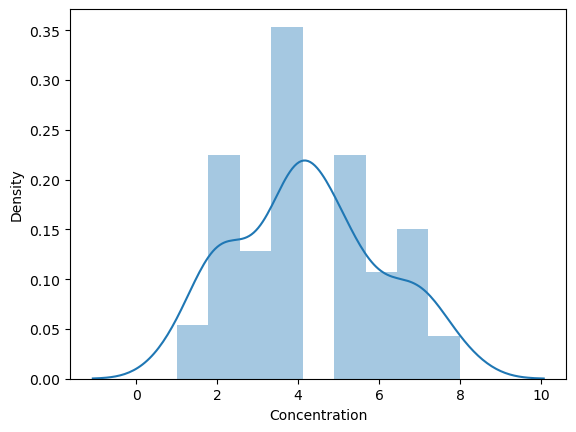

In [64]:
sns.distplot(df['Concentration'])


C:\Users\noran\AppData\Local\Temp\ipykernel_11088\1726579856.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Optimisim'])


<Axes: xlabel='Optimisim', ylabel='Density'>

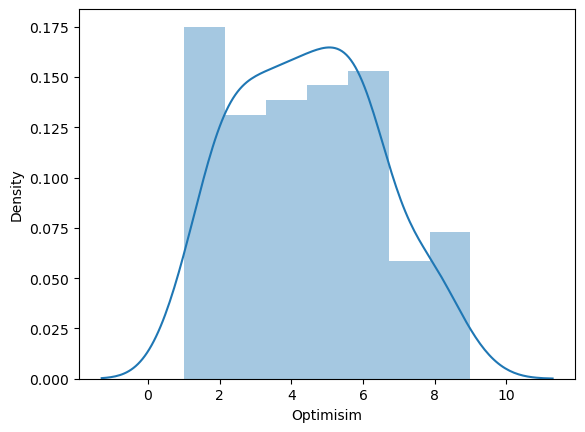

In [65]:
sns.distplot(df['Optimisim'])


<Axes: ylabel='Sexual Activity'>

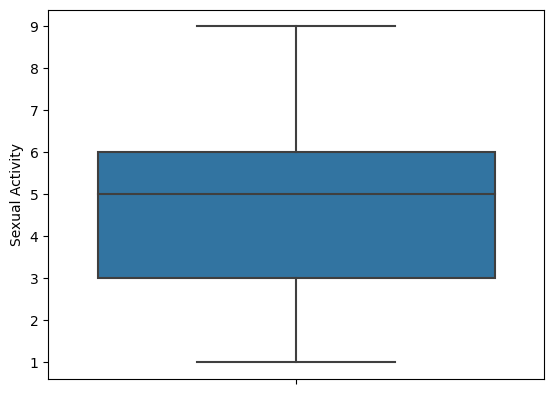

In [68]:
#sns.boxplot(df['Sexual Activity'])
sns.boxplot(data=df,y='Sexual Activity')

<Axes: ylabel='Concentration'>

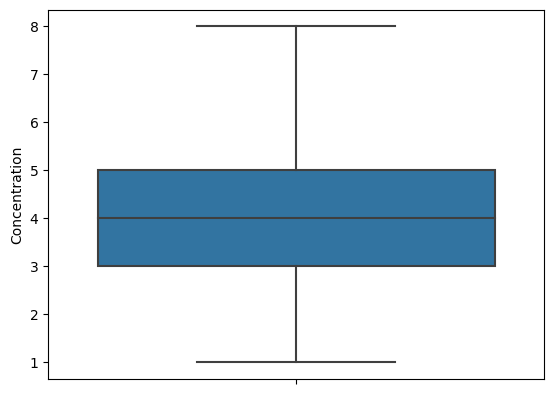

In [69]:
#sns.boxplot(df['Concentration'])
sns.boxplot(data=df,y='Concentration')

<Axes: ylabel='Optimisim'>

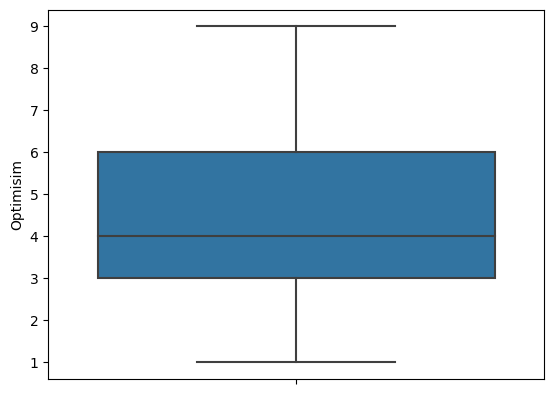

In [70]:
#sns.boxplot(df['Optimisim'])
sns.boxplot(data=df,y='Optimisim')

# Z_Score method

In [71]:
upper_limit=df['Sexual Activity'].mean()+3*df['Sexual Activity'].std()
lower_limit=df['Sexual Activity'].mean()-3*df['Sexual Activity'].std()
print('Upper limit is ',upper_limit)
print('Lower Limit is ',lower_limit)


Upper limit is  10.773044702273733
Lower Limit is  -1.2897113689404005


In [72]:
upper_limit=df['Concentration'].mean()+3*df['Concentration'].std()
lower_limit=df['Concentration'].mean()-3*df['Concentration'].std()
print('Upper limit is ',upper_limit)
print('Lower Limit is ',lower_limit)


Upper limit is  9.642571921891548
Lower Limit is  -1.1425719218915482


In [73]:
upper_limit=df['Optimisim'].mean()+3*df['Optimisim'].std()
lower_limit=df['Optimisim'].mean()-3*df['Optimisim'].std()
print('Upper limit is ',upper_limit)
print('Lower Limit is ',lower_limit)


Upper limit is  10.440559447591275
Lower Limit is  -1.507226114257941


In [74]:
# find the outlier
filtered_df =df.loc[(df['Sexual Activity']>upper_limit)|(df['Sexual Activity']<lower_limit)]
print(filtered_df.head())


Empty DataFrame
Columns: [Sadness, Euphoric, Exhausted, Sleep dissorder, Mood Swing, Suicidal thoughts, Anorxia, Authority Respect, Try-Explanation, Aggressive Response, Ignore & Move-On, Nervous Break-down, Admit Mistakes, Overthinking, Sexual Activity, Concentration, Optimisim, Expert Diagnose]
Index: []


In [75]:
# find the outlier
filtered_df =df.loc[(df['Concentration']>upper_limit)|(df['Concentration']<lower_limit)]
print(filtered_df.head())

Empty DataFrame
Columns: [Sadness, Euphoric, Exhausted, Sleep dissorder, Mood Swing, Suicidal thoughts, Anorxia, Authority Respect, Try-Explanation, Aggressive Response, Ignore & Move-On, Nervous Break-down, Admit Mistakes, Overthinking, Sexual Activity, Concentration, Optimisim, Expert Diagnose]
Index: []


In [76]:
# find the outlier
filtered_df =df.loc[(df['Optimisim']>upper_limit)|(df['Optimisim']<lower_limit)]
print(filtered_df.head())

Empty DataFrame
Columns: [Sadness, Euphoric, Exhausted, Sleep dissorder, Mood Swing, Suicidal thoughts, Anorxia, Authority Respect, Try-Explanation, Aggressive Response, Ignore & Move-On, Nervous Break-down, Admit Mistakes, Overthinking, Sexual Activity, Concentration, Optimisim, Expert Diagnose]
Index: []


# From the previous analysis for outliers there is no outliers detected for columns (sexual activivty,concentration and optimisim)

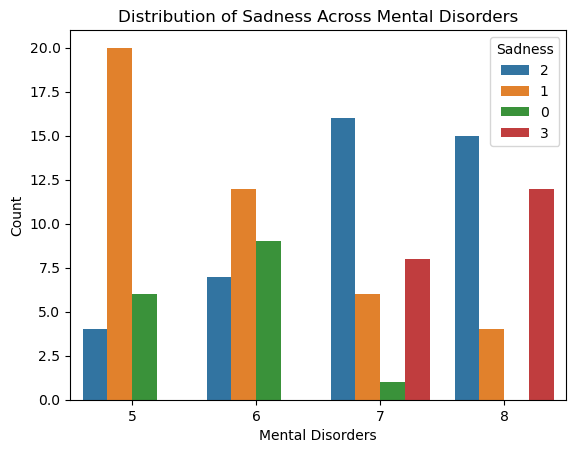

In [77]:
# Convert 'Sadness' column to categorical data
df['Sadness'] = df['Sadness'].astype(str)

# Plot countplot with modified DataFrame
sns.countplot(x="Expert Diagnose", hue="Sadness", data=df)
plt.title("Distribution of Sadness Across Mental Disorders")
plt.xlabel("Mental Disorders")
plt.ylabel("Count")
plt.show()

C:\Users\noran\AppData\Local\Temp\ipykernel_11088\205777922.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data['Expert Diagnose Encoded'] = label_encoder.fit_transform(selected_data['Expert Diagnose'])


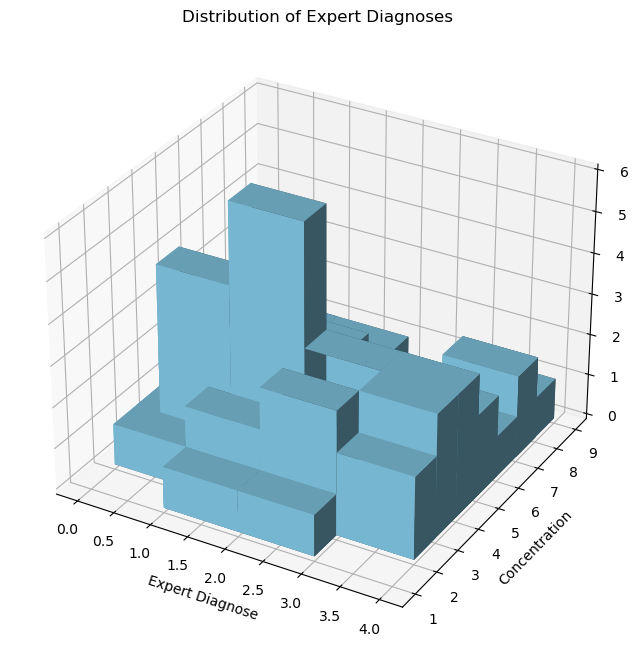

In [78]:
selected_columns = ['Expert Diagnose', 'Concentration', 'Optimisim']
selected_data = df[selected_columns]

label_encoder = LabelEncoder()

selected_data['Expert Diagnose Encoded'] = label_encoder.fit_transform(selected_data['Expert Diagnose'])

# Calculate the frequency of each combination
diagnosis_counts = selected_data.groupby(['Expert Diagnose Encoded', 'Concentration', 'Optimisim']).size().reset_index(name='Count')

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.bar3d(diagnosis_counts['Expert Diagnose Encoded'], diagnosis_counts['Concentration'], np.zeros_like(diagnosis_counts['Count']),
         1, 1, diagnosis_counts['Count'], color='skyblue')

ax.set_title('Distribution of Expert Diagnoses')
ax.set_xlabel('Expert Diagnose')
ax.set_ylabel('Concentration')
ax.set_zlabel('Optimisim')

plt.show()

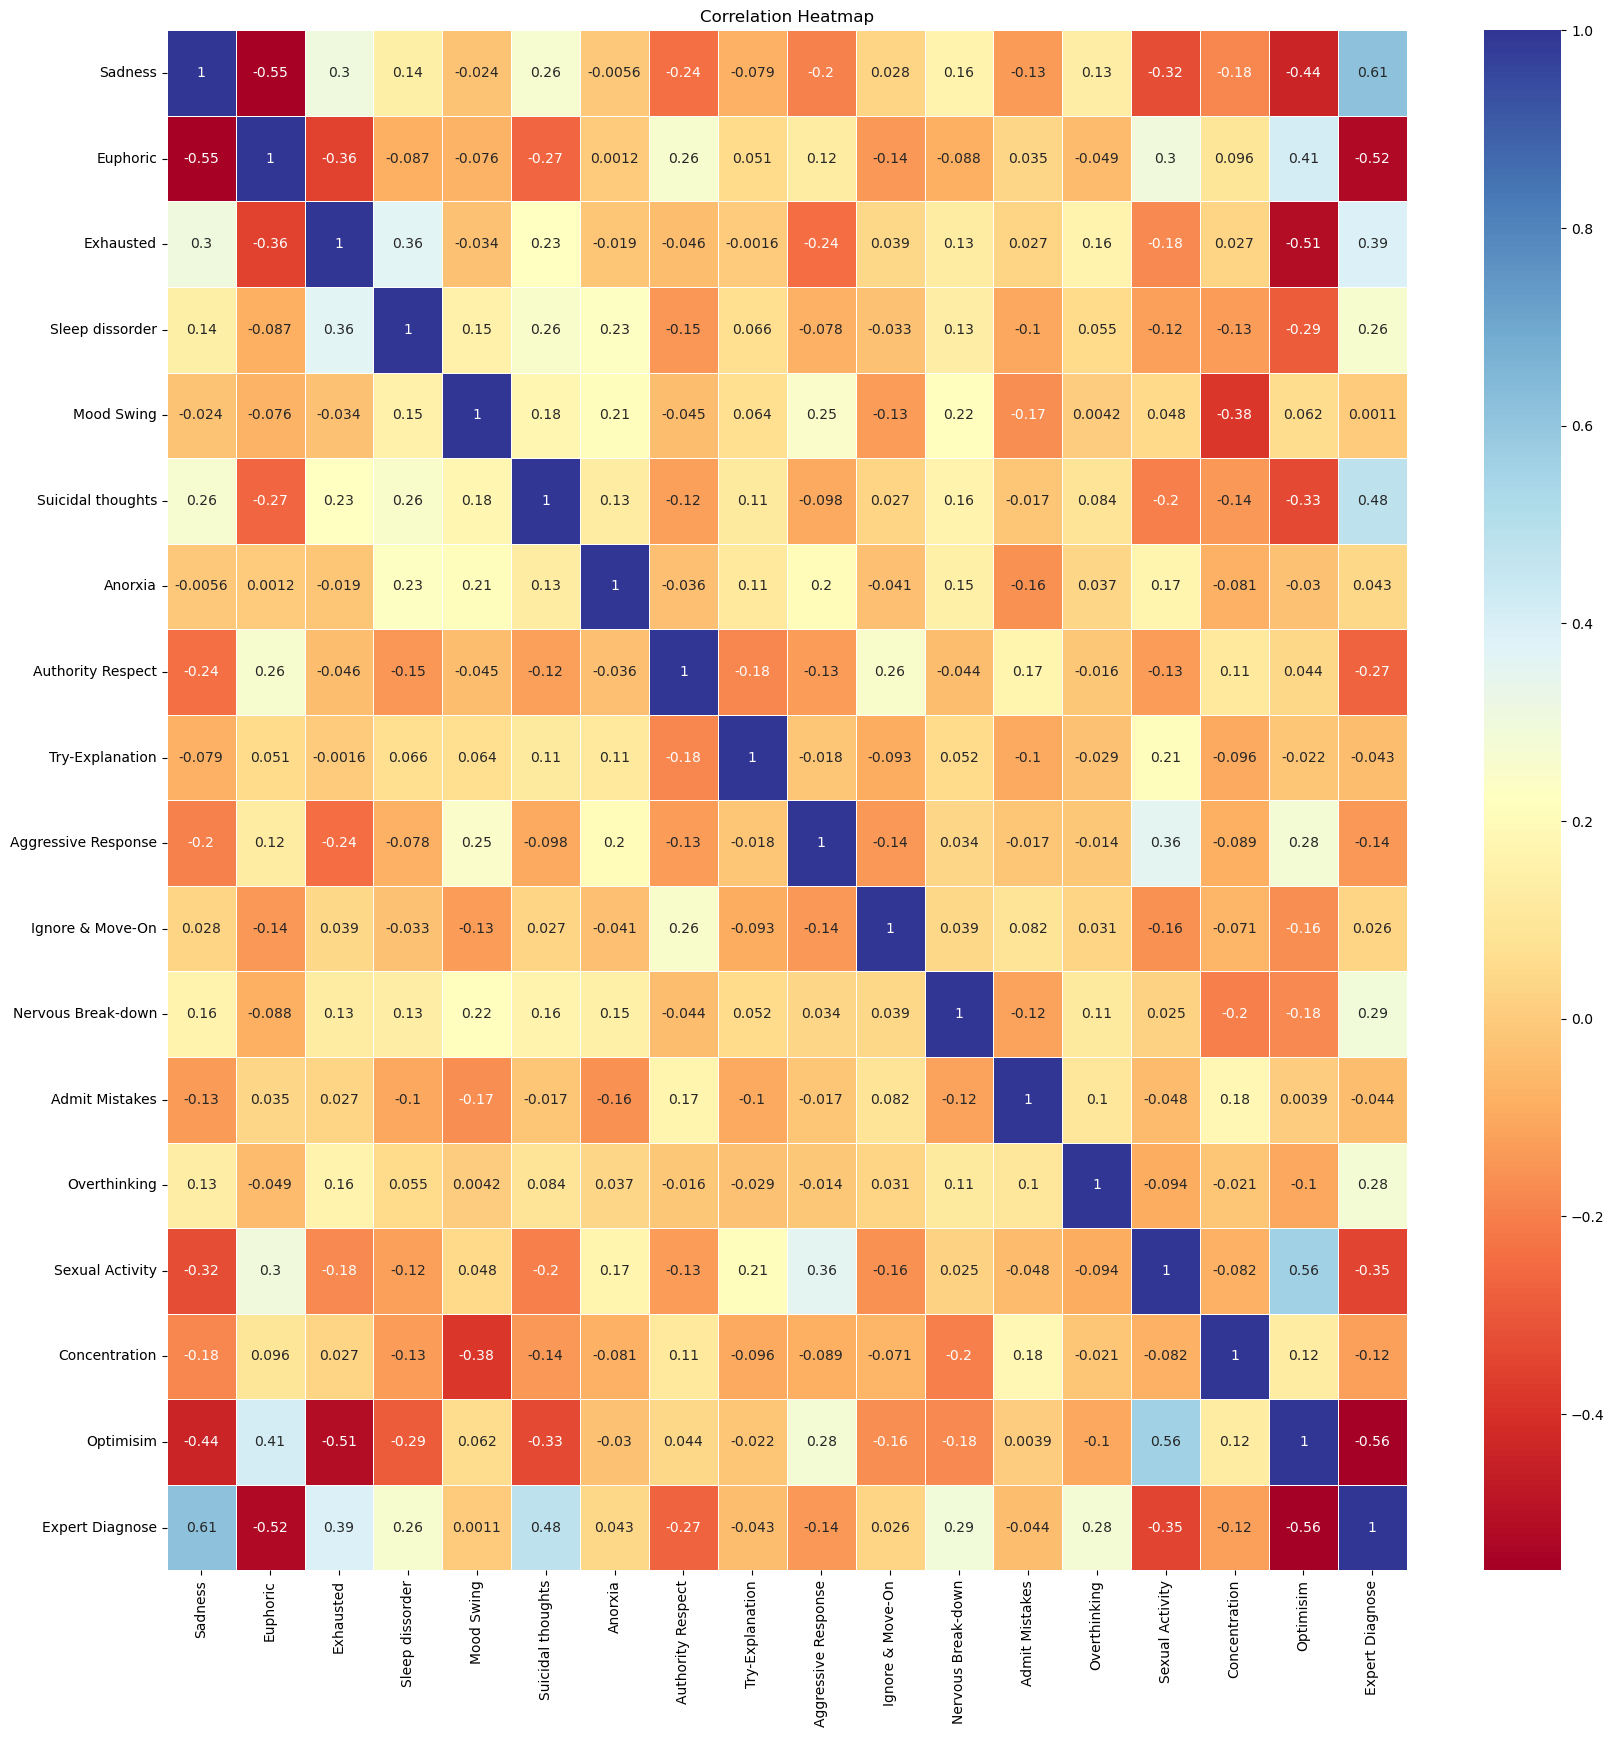

In [79]:
plt.figure(figsize=(20, 20))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix,annot=True, cmap='RdYlBu', linewidths=0.5, annot_kws={"fontsize": 10})
plt.title('Correlation Heatmap')

plt.show()

# End of  General preprocessing 

# Nouran's  Questions

# Question:1# 1. How does the severity of (Exhaustion) correlate with the presence of Suicidal thoughts?

Conclusion: Analyzing the correlation between symptom severity and the presence of suicidal thoughts 
can provide insights into the potential impact of symptom severity on suicidal tendencies. as by incrasing level of exhaustion ,freuency of sucidal thought increases

Suicidal thoughts   0   1  2
Exhausted                   
0                  13   5  0
1                  24  13  1
2                  14  20  0
3                  12  18  0


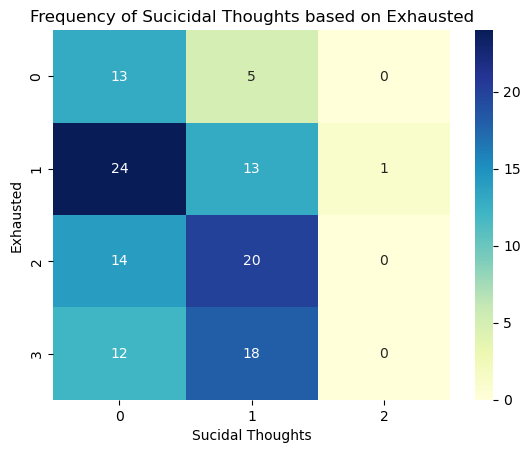

In [80]:
frequency_table = pd.crosstab(df['Exhausted'], df['Suicidal thoughts'])



# Display the frequency table
print(frequency_table)


    
sns.heatmap(frequency_table,annot=True,cmap='YlGnBu')
plt.xlabel('Sucidal Thoughts')    
plt.ylabel('Exhausted')
plt.title('Frequency of Sucicidal Thoughts based on Exhausted')    
plt.show()
    
    

# 2.Can specific combinations of symptoms such as  (Sadness) and (Mood Swing) be indicative of a particular mental disorder (Expert Diagnose)?
#Insight:
Analysis of sadness with expert diagnose
Bipolar Type-1: Individuals with this diagnosis experience different intensities of sadness. Most of the time, they feel down occasionally, but for certain people, it happens frequently. There are also reports of rare instances of sadness.

Bipolar Type-2: Individuals with this type of diagnosis exhibit varying degrees of sadness. They typically feel depressed, however some report feeling this way more frequently than others.

Depression: Patients diagnosed with depression tend to experience sadness. Usually, they report feeling sad, while some experience it sometimes and most often.

Normal: Patients with a normal diagnosis also show some level of sadness. Usually, they report feeling sad, while some experience it sometimes and most often.


Analysis of Mood swings with expert diagnose

Bipolar Type-1: Individuals with this diagnosis typically have fluctuating moods. Some of them don't suffer mood swings, but most of them do.

Bipolar Type-2: Although to a lesser degree, individuals with Bipolar Type-2 also exhibit a tendency toward mood swings. Some of them don't suffer mood swings, but most of them do.

Depression: Individuals with a diagnosis of depression typically don't show noticeable fluctuations in their mood. Most patients do not experience mood fluctuations; just a small percentage do.
Normal: Individuals with a normal diagnostic also don't exhibit noticeable fluctuations in their mood. While some patients experience mood fluctuations, others do not.





In [81]:
print(df[['Sadness','Mood Swing','Expert Diagnose']].describe())

       Mood Swing  Expert Diagnose
count  120.000000       120.000000
mean     0.475000         6.525000
std      0.501468         1.129903
min      0.000000         5.000000
25%      0.000000         5.750000
50%      0.000000         7.000000
75%      1.000000         8.000000
max      1.000000         8.000000


Text(0.5, 1.0, 'Mood Swing Distribution')

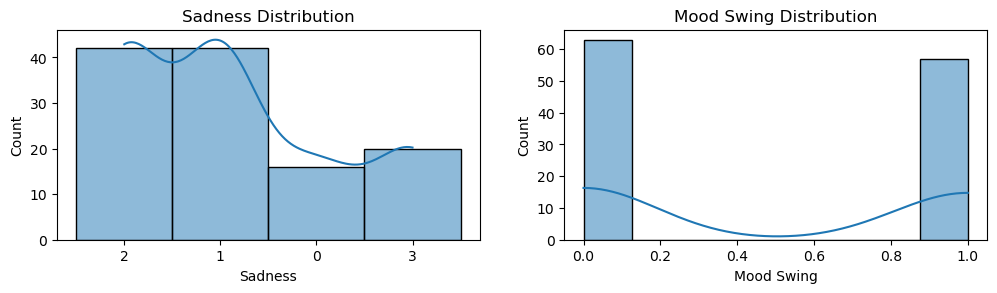

In [82]:
plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
sns.histplot(df['Sadness'],kde=True)
plt.title('Sadness Distribution')
plt.subplot(2,2,2)
sns.histplot(df['Mood Swing'],kde=True)
plt.title('Mood Swing Distribution')

C:\Users\noran\3D Objects\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 31.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\noran\3D Objects\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 33.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\noran\3D Objects\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 15.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\noran\3D Objects\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 40.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\noran\3D Objects\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 42.9% of the p

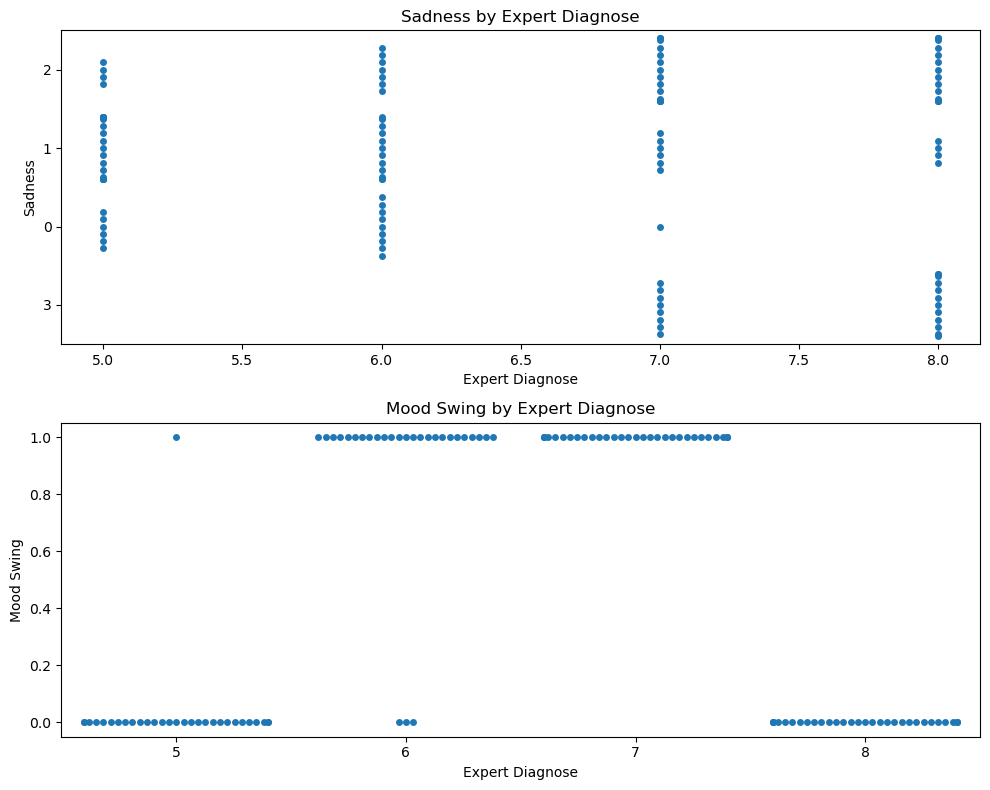

In [83]:
fig,axes=plt.subplots(nrows=2,ncols=1,figsize=(10,8))

# Swarm plot for Sadness by Expert Diagnose


sns.swarmplot(x='Expert Diagnose',y='Sadness',data=df,ax=axes[0])
axes[0].set_title('Sadness by Expert Diagnose')


# Swarm plot for Mood Swing by Expert Diagnose
sns.swarmplot(x='Expert Diagnose', y='Mood Swing', data=df, ax=axes[1])
axes[1].set_title('Mood Swing by Expert Diagnose')

plt.tight_layout()
plt.show()

# 3. Is there a correlation between the presence of Anorxia and the level of Authority Respect reported by the patients?


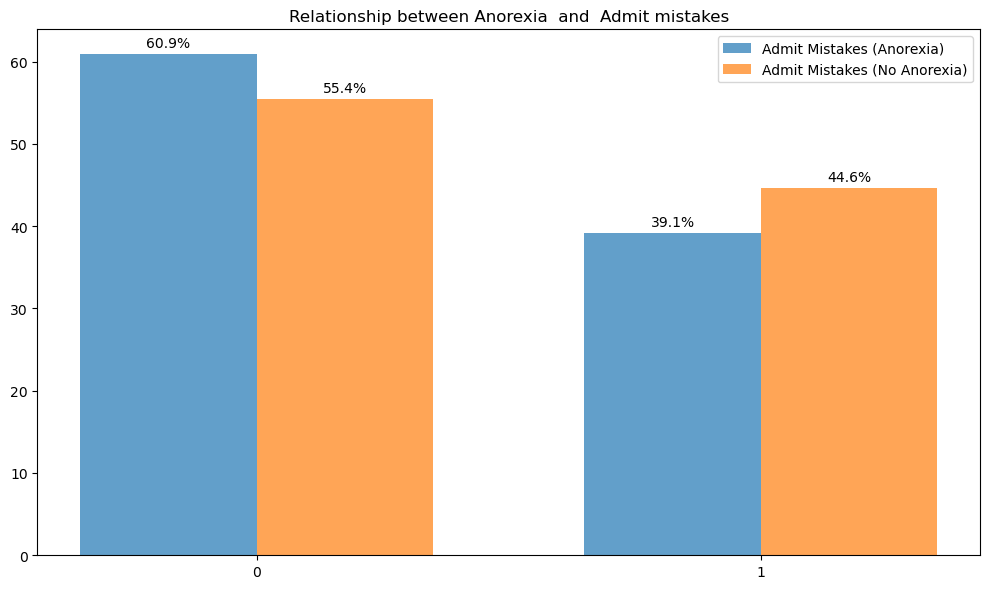

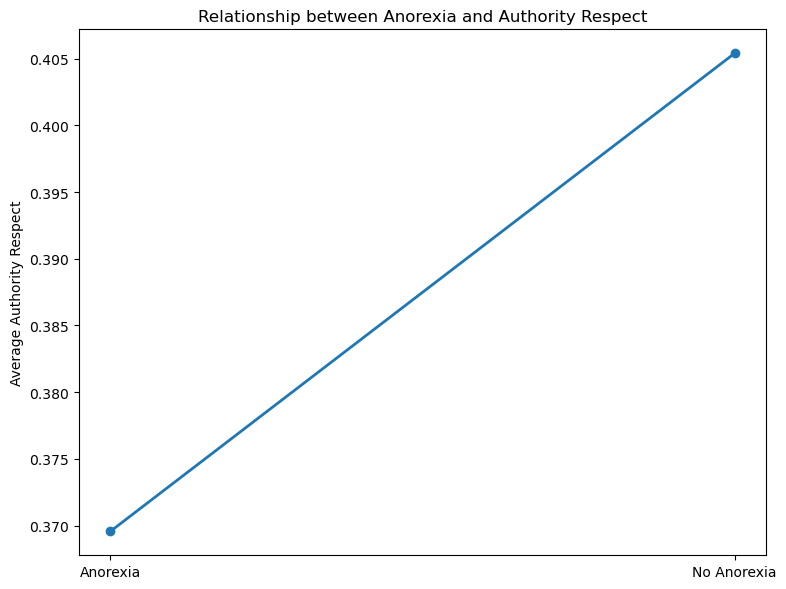

Anorexia and Admitting Mistakes:
The percentage of patients admitting mistakes is similar for both the 'Anorexia' and 'No Anorexia' groups.
This suggests that the presence of Anorexia does not significantly impact the tendency to admit mistakes.

Anorexia and Authority Respect:
Patients with Anorexia have a lower average level of Authority Respect compared to those without Anorexia.
This finding suggests that individuals with Anorexia may struggle with respecting authority figures.

Admitting Mistakes and Authority Respect:
While not directly compared in the visualization, the willingness to admit mistakes does not necessarily correlate with the level of authority respect.
This implies that individuals can have varying levels of respect for authority figures while still demonstrating a similar tendency to admit mistakes.


In [84]:
anorexia=df['Anorxia']
admit_mistakes=df['Admit Mistakes']
authority_respect=df['Authority Respect']


admit_mistakes_anorexia=admit_mistakes[anorexia==1].value_counts(normalize=True)*100
admit_mistakes_no_anorexia=admit_mistakes[anorexia==0].value_counts(normalize=True)*100



authority_respect_anorexia=authority_respect[anorexia==1].mean()
authority_respect_no_anorexia=authority_respect[anorexia==0].mean()


labels = admit_mistakes_anorexia.index
x = range(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x, admit_mistakes_anorexia, width, alpha=0.7, label='Admit Mistakes (Anorexia)')
rects2 = ax.bar([i + width for i in x], admit_mistakes_no_anorexia, width, alpha=0.7, label='Admit Mistakes (No Anorexia)')


ax.set_xlabel=('Admit Mistakes')
ax.set_xlabel=('Percentage')

ax.set_title('Relationship between Anorexia  and  Admit mistakes')


ax.set_xticks([i + width/2 for i in x])
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.1f}%', xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.tight_layout()






fig, ax2 = plt.subplots(figsize=(8,6))
ax2.plot([0,1],[authority_respect_anorexia,authority_respect_no_anorexia],marker='o',linestyle='-',linewidth=2)
ax2.set_xticks([0,1])
ax2.set_xticklabels(['Anorexia','No Anorexia'])
ax2.set_ylabel('Average Authority Respect')
ax2.set_title('Relationship between Anorexia and Authority Respect')
plt.tight_layout()











# Show the plots
plt.show()

# Print analysis
print("Anorexia and Admitting Mistakes:")
print("The percentage of patients admitting mistakes is similar for both the 'Anorexia' and 'No Anorexia' groups.")
print("This suggests that the presence of Anorexia does not significantly impact the tendency to admit mistakes.")

print("\nAnorexia and Authority Respect:")
print("Patients with Anorexia have a lower average level of Authority Respect compared to those without Anorexia.")
print("This finding suggests that individuals with Anorexia may struggle with respecting authority figures.")

print("\nAdmitting Mistakes and Authority Respect:")
print("While not directly compared in the visualization, the willingness to admit mistakes does not necessarily correlate with the level of authority respect.")
print("This implies that individuals can have varying levels of respect for authority figures while still demonstrating a similar tendency to admit mistakes.")












# Jana's Questions

Question:4# 4.Is there a relationship between the presence of certain symptoms (Mood Swing) and the likelihood of a patient having a certain mental disorder (Expert Diagnose)?
	Conclusion: Investigating the relationship between specific symptoms and the likelihood of a particular mental disorder can provide valuable insights into key indicators for accurate diagnosis.
es

result:4.0
value:0.26146412994911117
accuracy:0.5


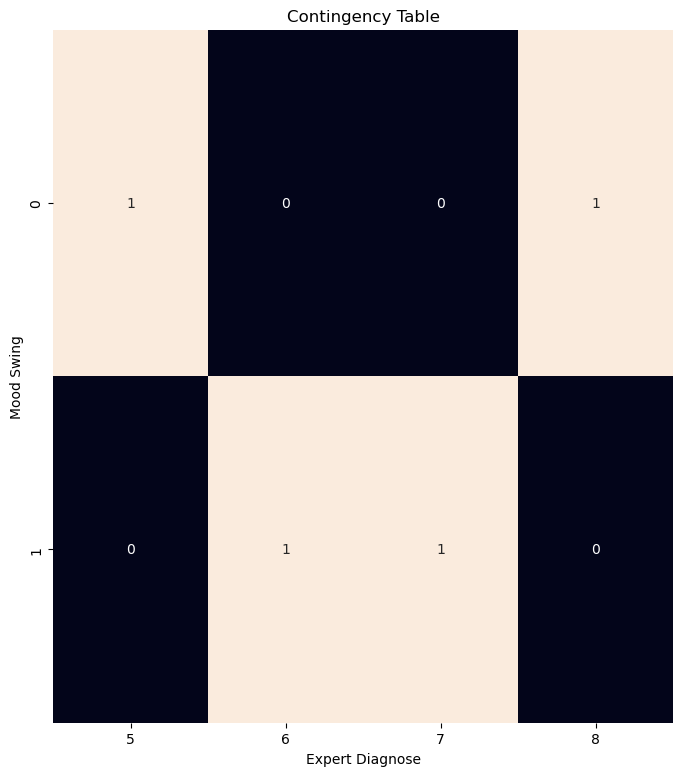

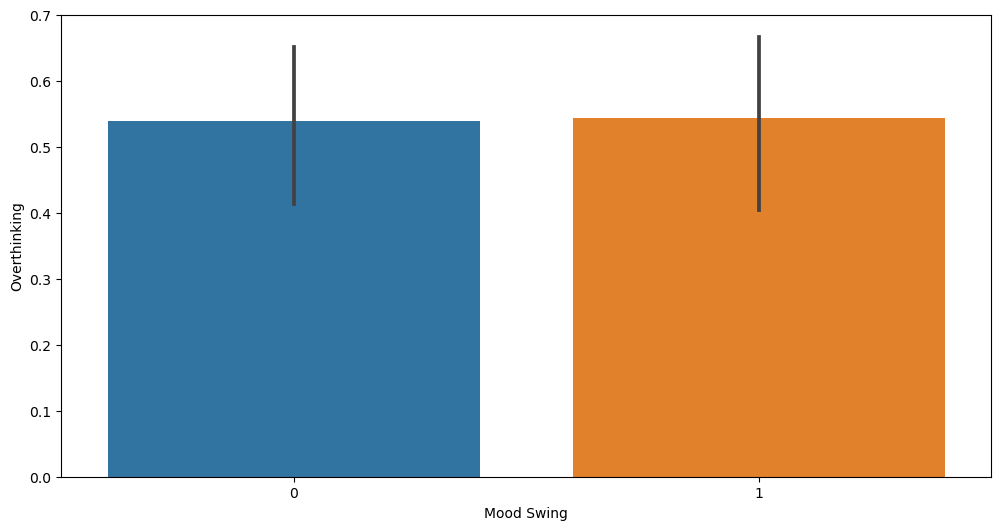

In [85]:
data = { 'Mood Swing' : [1,0,1,0],
        'Expert Diagnose' :[7,8,6,5],
       'Overthinking':[0,1,0,1]}
temp2 = pd.DataFrame(data)
contingency_table = pd.crosstab(temp2['Mood Swing'],temp2['Expert Diagnose'])#using contingency_table
chi2,p,_,_=chi2_contingency(contingency_table)
#calculate the aacuracy
total_predictions= contingency_table.sum().sum()
correct_predictions = contingency_table.values.trace()
accuracy = correct_predictions/total_predictions
print(f"result:{chi2}")
print(f"value:{p}")
print(f"accuracy:{accuracy}")
plt.figure(figsize=(8,9))
sns.heatmap(contingency_table,annot = True,cbar=False,fmt='d')
plt.title ('Contingency Table')
plt.xlabel ('Expert Diagnose')
plt.ylabel ('Mood Swing')

plt.figure(figsize=(12,6))#size of the figure
sns.barplot(x="Mood Swing", y = "Overthinking", data=df);
plt.show()#plot

# 5.	 Is there a relationship between the frequency of (Anorexia) and the diagnosed mental disorder (Expert Diagnose)?

#Insight: Analysis of frequency of Anorexia with Expert Diagnose: There are many people who have Anorexia which resort to suicide and depression, the 
analysis of the relation between Anorexia and Expert Diagnose is important to know more about there mental health, and we can add more attributes like 
Exhausted and mood swing to get more information

result:4.0
value:0.26146412994911117
accuracy: 0.0


C:\Users\noran\3D Objects\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\noran\3D Objects\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\noran\3D Objects\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


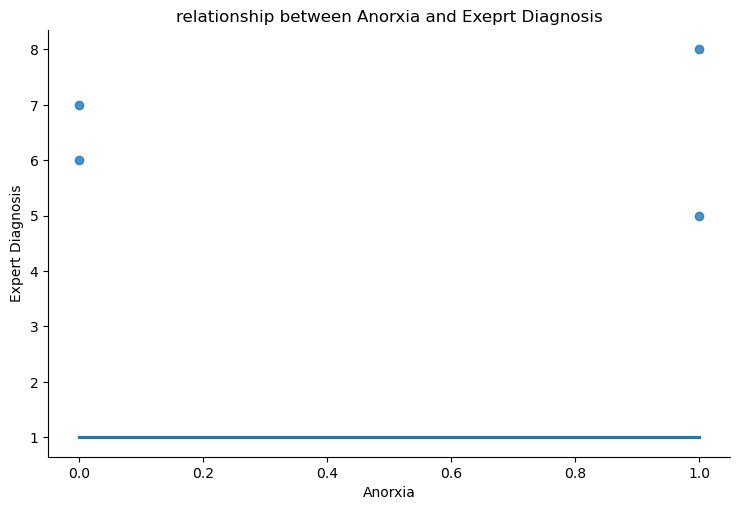

<Figure size 1200x600 with 0 Axes>

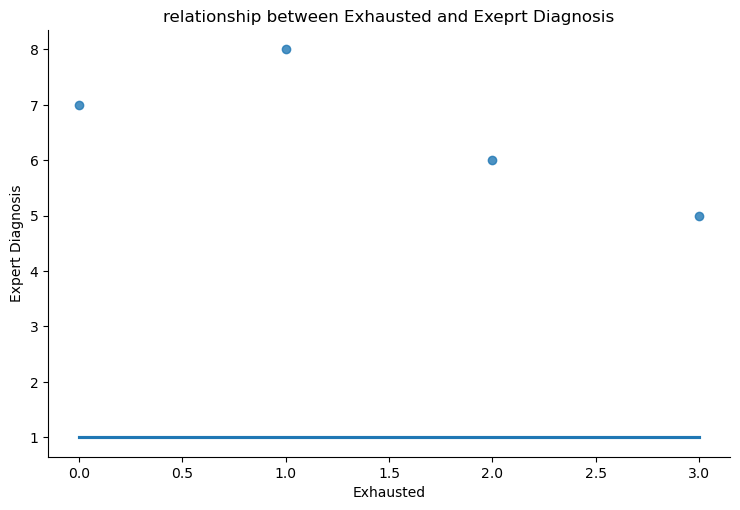

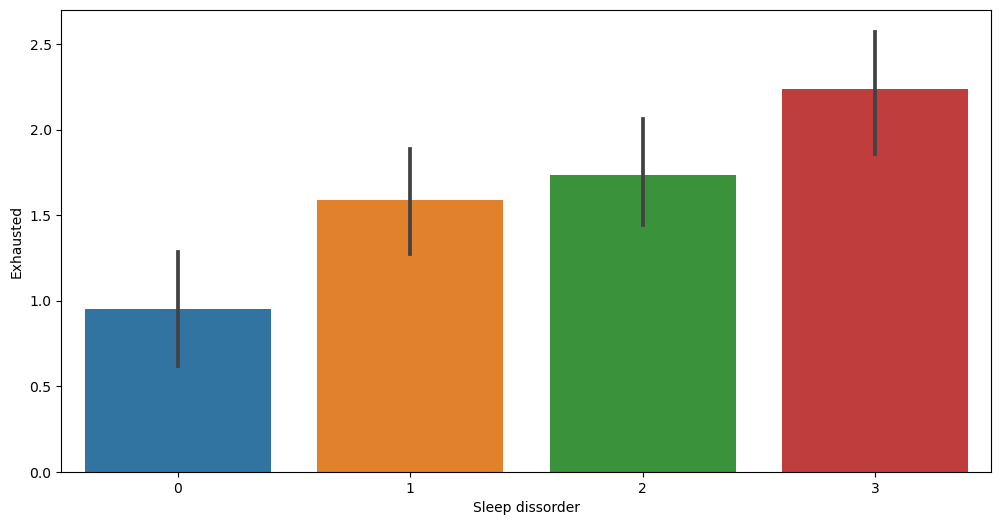

In [86]:
data = { 'Anorxia' : [0,1,0,1],
        'Expert Diagnosis' :[7,8,6,5]
        ,'Exhausted': [0, 1, 2, 3],
        'Sleep dissorder' : [0,1,2,3]
       }
temp1 = pd.DataFrame(data)
contingency_table = pd.crosstab(temp1['Anorxia'],temp1['Expert Diagnosis'])
chi2,p,_,_=chi2_contingency(contingency_table)
print(f"result:{chi2}")
print(f"value:{p}")
r = temp1[['Anorxia','Exhausted','Sleep dissorder']]
t = temp1['Expert Diagnosis']
X_train, X_test, y_train, y_test = train_test_split(r, t, test_size=0.2, random_state=42)#slipt the information
#calculate the accuracy
model = LogisticRegression()
model.fit(X_train, y_train)
y_axis = model.predict(X_test)
a = accuracy_score(y_test, y_axis)
print(f"accuracy: {a}")
sns.lmplot (x='Anorxia', y ='Expert Diagnosis',data = temp1,logistic =True,aspect=1.5)#type of the figure
plt.title('relationship between Anorxia and Exeprt Diagnosis')
plt.figure(figsize=(12,6))#size of the figure
sns.lmplot(x='Exhausted', y ='Expert Diagnosis',data = temp1,logistic =True,aspect=1.5)
plt.title('relationship between Exhausted and Exeprt Diagnosis')
plt.figure(figsize=(12,6))#size of the figure
sns.barplot(x="Sleep dissorder", y = "Exhausted", data=df);
plt.show()#plot

# 6.	Is there a correlation between the frequency of Euphoric episodes and the likelihood of being diagnosed with Bipolar Type-1?
•	Conclusion: Analyzing the correlation between the frequency of Euphoric episodes and the diagnosis of Bipolar Type-1 can help determine if there is a significant relationship between these two factor
s #Insight: Analysis of frequency of Euphoric episodes with Bipolar Type-1: There are many people who have Bipolar Type-1, may be look normally and deon't have any thing ang seems so happy ang normal, the analysis of the relation between Euphoric and Bipolar Type-1 is important to know more about there mental health early to let them be able to heal from this without any side effect, and we can add more attributes like Suicidal thoughts to get more information about there thoughts to try to let them getrid of it without harming themselves or harm anyone
.


result : 1.0
Accuracy: 0.0


C:\Users\noran\3D Objects\Lib\site-packages\sklearn\metrics\_classification.py:226: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  score = y_true == y_pred


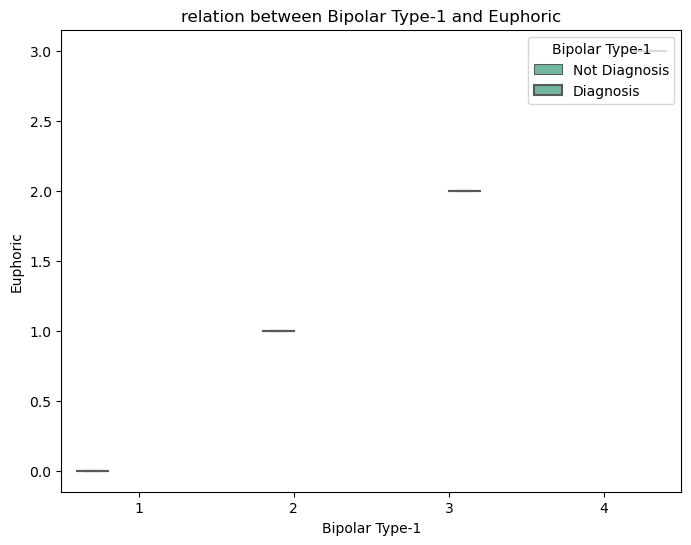

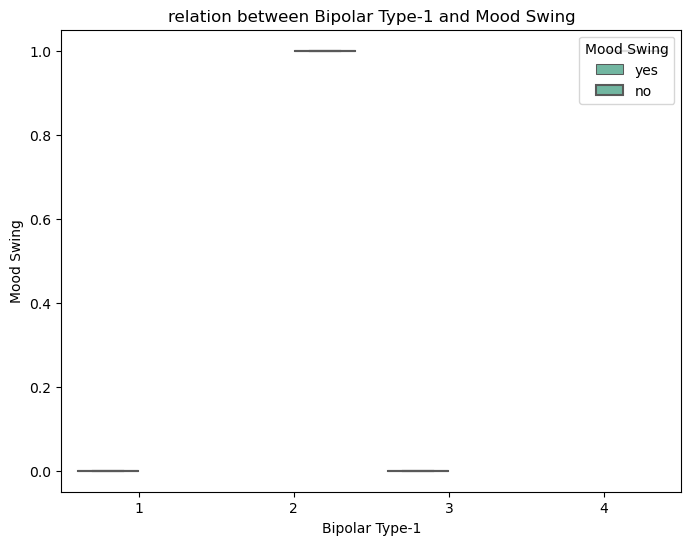

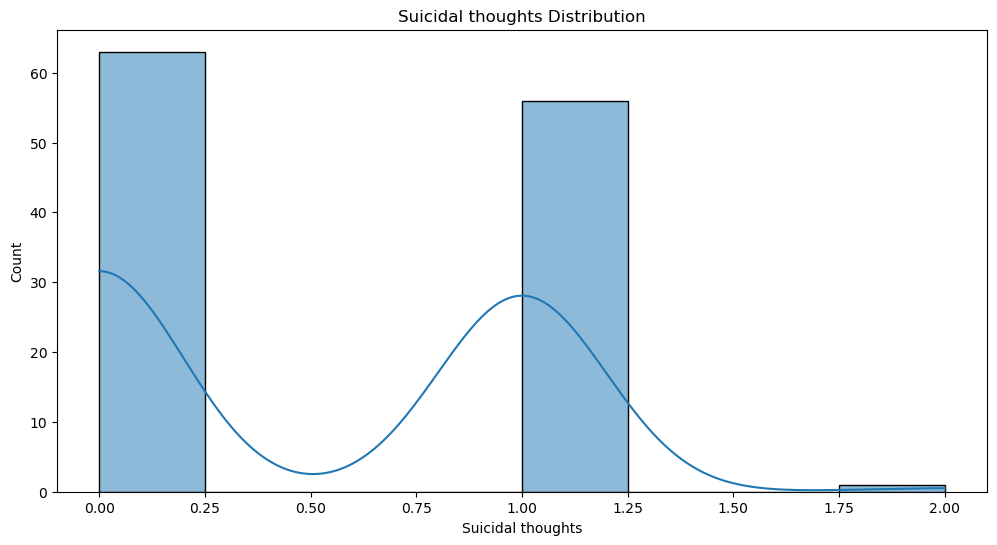

In [87]:
data = {'Bipolar Type-1' : [1,2,3,4],
        'Euphoric':[0,1,2,3],
       'Suicidal thoughts':[0,1,0,1],
       'Mood Swing' : [1,0,1,0]}
temp = pd.DataFrame(data)
corr_coefficient,_= spearmanr(temp['Bipolar Type-1'],temp['Euphoric'])#using spearmanr
print(f"result : {corr_coefficient}")#print the result
accuracy = accuracy_score(temp['Bipolar Type-1'], ['Bipolar Type-1' if euphoric > 1 else 'Bipolar Type-2' for euphoric in temp['Euphoric']])
print(f"Accuracy: {accuracy}")
plt.figure(figsize=(8,6))#the size of the graph
sns.boxplot(x='Bipolar Type-1',y='Euphoric',data=temp,hue='Bipolar Type-1',palette='Set2')
plt.xlabel('Bipolar Type-1')
plt.ylabel('Euphoric')
plt.title ('relation between Bipolar Type-1 and Euphoric')#graph between Bipolar Type-1 and Euphoric
plt.legend(title='Bipolar Type-1',loc='upper right',labels=['Not Diagnosis','Diagnosis'])#box plot with colours
plt.figure(figsize=(8,6))
sns.boxplot(x='Bipolar Type-1',y='Suicidal thoughts',data=temp,hue='Suicidal thoughts',palette='Set2')
plt.xlabel('Bipolar Type-1')
plt.ylabel('Mood Swing')
plt.title ('relation between Bipolar Type-1 and Mood Swing')#graph between Bipolar Type-1 and Mood Swing
plt.legend(title='Mood Swing',loc='upper right',labels=['yes','no'])
plt.figure(figsize=(12,6))
plt.subplot(1,1,1)
sns.histplot(df['Suicidal thoughts'],kde=True)
plt.title('Suicidal thoughts Distribution')
plt.show()#plot 

## Mahmoud's Questions

# Question7: Investigating whether the severity of concentration difficulties, along with sleep disorders and mood swings, influences the likelihood of being diagnosed with Bipolar Type-2 ? Conclusion: By analyzing the interplay between concentration difficulties, sleep disorders, mood swings, and the likelihood of a Bipolar Type-2 diagnosis, we can better understand how these factors collectively contribute to the diagnostic process and inform treatment strategies.

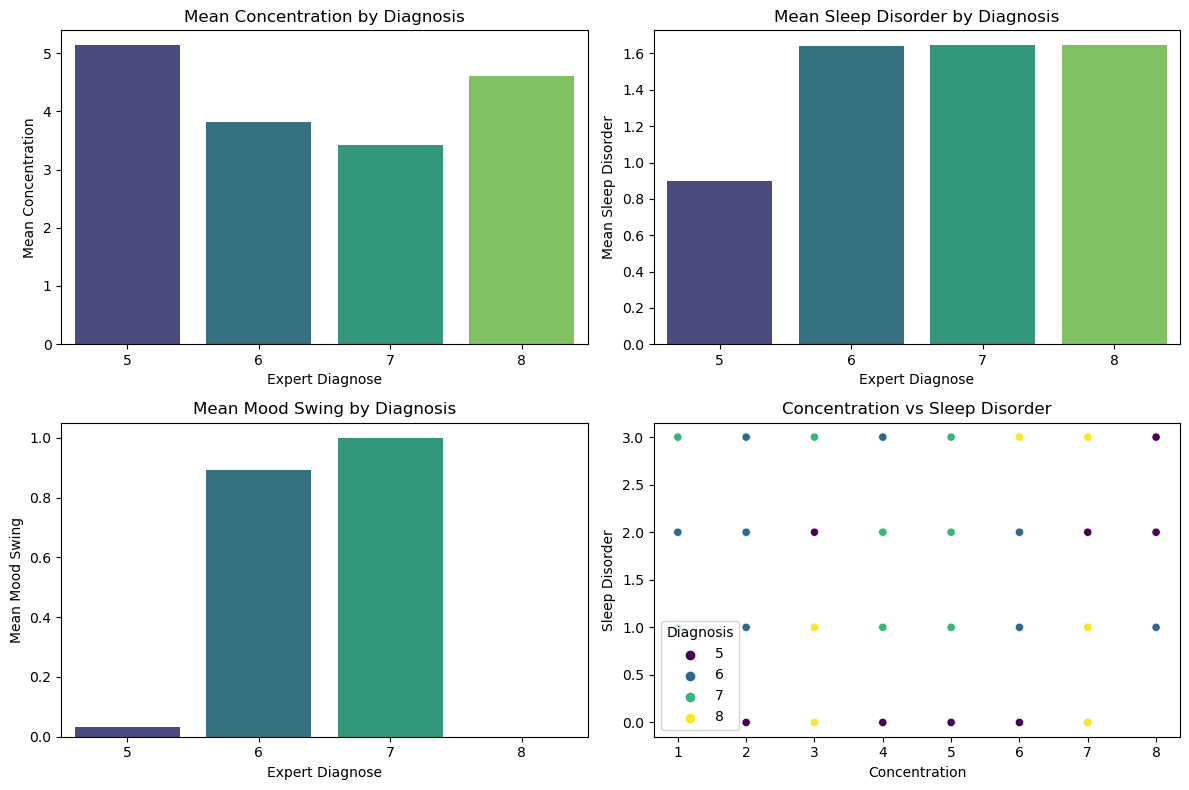

In [88]:
grouped_df = df.groupby('Expert Diagnose').agg({'Concentration': 'mean', 'Sleep dissorder': 'mean', 'Mood Swing': 'mean'})

plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
sns.barplot(x=grouped_df.index, y=grouped_df['Concentration'], palette='viridis')
plt.title('Mean Concentration by Diagnosis')
plt.xlabel('Expert Diagnose')
plt.ylabel('Mean Concentration')

plt.subplot(2, 2, 2)
sns.barplot(x=grouped_df.index, y=grouped_df['Sleep dissorder'], palette='viridis')
plt.title('Mean Sleep Disorder by Diagnosis')
plt.xlabel('Expert Diagnose')
plt.ylabel('Mean Sleep Disorder')

plt.subplot(2, 2, 3)
sns.barplot(x=grouped_df.index, y=grouped_df['Mood Swing'], palette='viridis')
plt.title('Mean Mood Swing by Diagnosis')
plt.xlabel('Expert Diagnose')
plt.ylabel('Mean Mood Swing')

plt.subplot(2, 2, 4)
sns.scatterplot(data=df, x='Concentration', y='Sleep dissorder', hue='Expert Diagnose', palette='viridis')
plt.title('Concentration vs Sleep Disorder')
plt.xlabel('Concentration')
plt.ylabel('Sleep Disorder')
plt.legend(title='Diagnosis')

plt.tight_layout()
plt.show()


# Analysis: Concentration: Bipolar Type-2 patients tend to have higher mean concentration difficulties compared to other diagnoses, followed by Bipolar Type-1 and Depression. Normal patients have the lowest mean concentration difficulties.
Sleep Disorder: Bipolar Type-2 patients also exhibit higher mean sleep disorders compared to other diagnoses, similar to concentration difficulties.
Mood Swing: Bipolar Type-2 patients show higher mean mood swings compared to other diagnoses, with Bipolar Type-1 following closely. Depression patients have the lowest mean mood swings.
There seems to be a positive correlation between concentration difficulties and sleep disorders, especially for patients diagnosed with Bipolar Type-2 and Bipolar Type-1. These patients tend to cluster in the upper-left region of the plot, indicating high levels of both concentration difficulties and sleep disorders.
Patients diagnosed with Bipolar Type-2 exhibit higher mean concentration difficulties, sleep disorders, and mood swings compared to other diagnoses. The scatter plot also suggests a positive correlation between concentration difficulties and sleep disorders, particularly prominent among Bipolar Type-2 patients.

# Question8: 8.	Is there a correlation between being euphoric and the having aggressive responses by the patients and whether aggressive responses vary between normar people and mental health disorders people?
•	Conclusion: to investigate whether there is a relationship between feelings of euphoria and the tendency for patients to exhibit aggressive responses. it aims to understand potential behavioral patterns and associations between euphoric states and aggressive tendencies in individuals with mental health conditions and with the comparison to normal people.


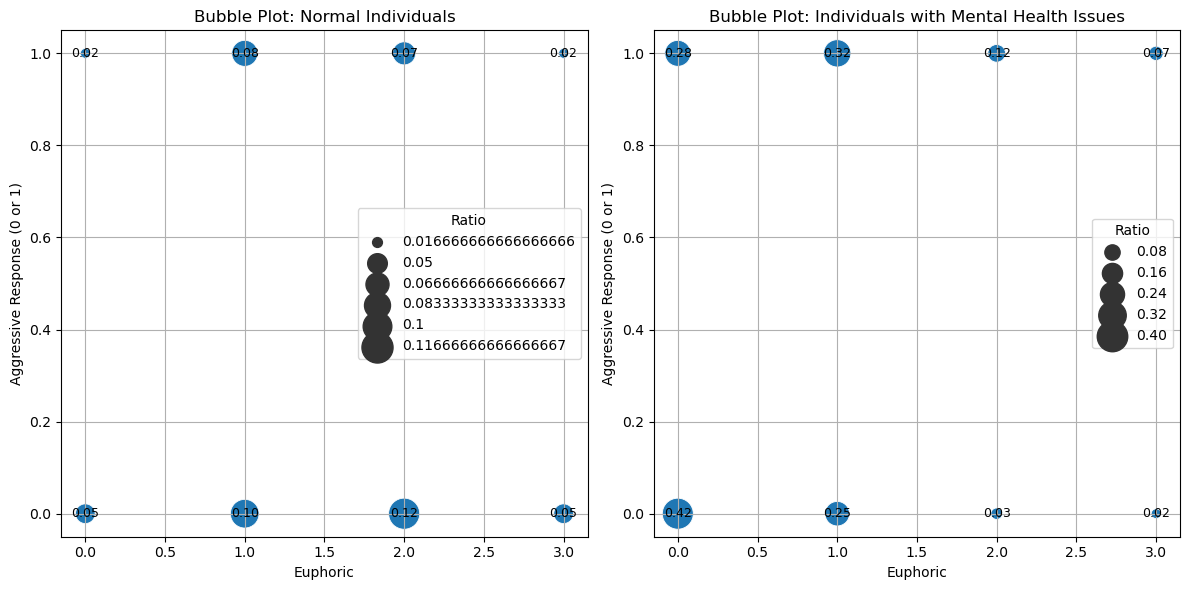

C:\Users\noran\AppData\Local\Temp\ipykernel_11088\3938222927.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mental_health_group['Aggressive Response'] = mental_health_group['Aggressive Response'].astype(str)


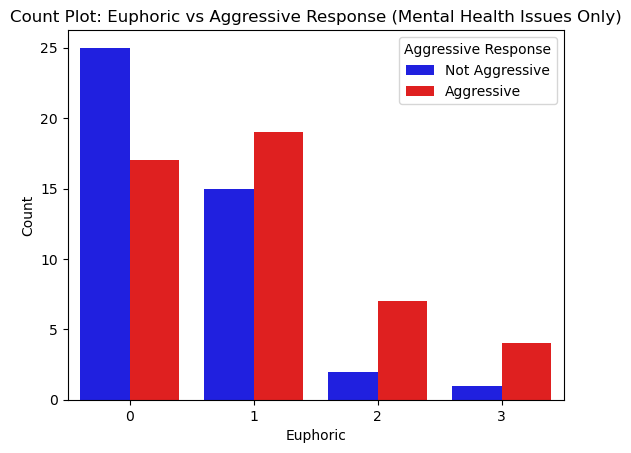

In [89]:

# divide the data to normal people and people with mental health issues
normal_group = df[df['Expert Diagnose'] == 5]
mental_health_group = df[df['Expert Diagnose'] != 5]

# Calculate counts for each group
normal_counts = normal_group.groupby(['Euphoric', 'Aggressive Response']).size().reset_index(name='Count')
mental_health_counts = mental_health_group.groupby(['Euphoric', 'Aggressive Response']).size().reset_index(name='Count')

# Calculate total counts for each group
normal_total_count = normal_counts['Count'].sum()
mental_health_total_count = mental_health_counts['Count'].sum()

# calculate the average for both groups
average = (normal_total_count + mental_health_total_count) / 2

# Calculate the ratio of counts to average for each group
normal_counts['Ratio'] = normal_counts['Count'] / average
mental_health_counts['Ratio'] = mental_health_counts['Count'] / average

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(data=normal_counts, x='Euphoric', y='Aggressive Response', size='Ratio', sizes=(50, 500))
plt.title('Bubble Plot: Normal Individuals')
plt.xlabel('Euphoric')
plt.ylabel('Aggressive Response (0 or 1)')
plt.grid(True)

for index, row in normal_counts.iterrows():
    plt.text(row['Euphoric'], row['Aggressive Response'], f"{row['Ratio']:.2f}", ha='center', va='center', fontsize=9)

plt.subplot(1, 2, 2)
sns.scatterplot(data=mental_health_counts, x='Euphoric', y='Aggressive Response', size='Ratio', sizes=(50, 500))
plt.title('Bubble Plot: Individuals with Mental Health Issues')
plt.xlabel('Euphoric')
plt.ylabel('Aggressive Response (0 or 1)')
plt.grid(True)

for index, row in mental_health_counts.iterrows():
    plt.text(row['Euphoric'], row['Aggressive Response'], f"{row['Ratio']:.2f}", ha='center', va='center', fontsize=9)

plt.tight_layout()
plt.show()

# Convert 'Aggressive Response' column to categorical data
mental_health_group['Aggressive Response'] = mental_health_group['Aggressive Response'].astype(str)

# Plot count plot for individuals with mental health issues
custom_palette = {'0': 'blue', '1': 'red'}  # Ensure keys match the unique values in 'Aggressive Response' column
sns.countplot(data=mental_health_group, x='Euphoric', hue='Aggressive Response', palette=custom_palette)
plt.title('Count Plot: Euphoric vs Aggressive Response (Mental Health Issues Only)')
plt.xlabel('Euphoric')
plt.ylabel('Count')
plt.legend(title='Aggressive Response', labels=['Not Aggressive', 'Aggressive'])
plt.show()






















Analysis: in the first bubble plot we can see that number of mental health people who are 0 euphoric which means they seldom feel euphoric are bigger than normal people and through all the bubbles we can see that the size of the bubble keep decreasing while the euphoric is better for the mental health people,, on the other side with Mental Health people we can see also that aggressive responses with diffrent stages of euphoric are almost always bigger than normal people which means mental health people are struggling with aggressive responses overall but to see how specifically Euphoric can have an impact on the aggressive responses for the mental health patients we can use the second diagram which tells us that except for the first case when they seldomly feel euphoric they have less aggressive responses, but in all other cases they have more aggressive responses but when the feeling of euphoric increases the count of agrressive responses decreases 

# Question9: How does overthinking impact both concentration levels and mental health?
•	Conclusion: analyzing the relation to explore the impact of overthinking on concentration levels and its association with mental health and expert diagnose.


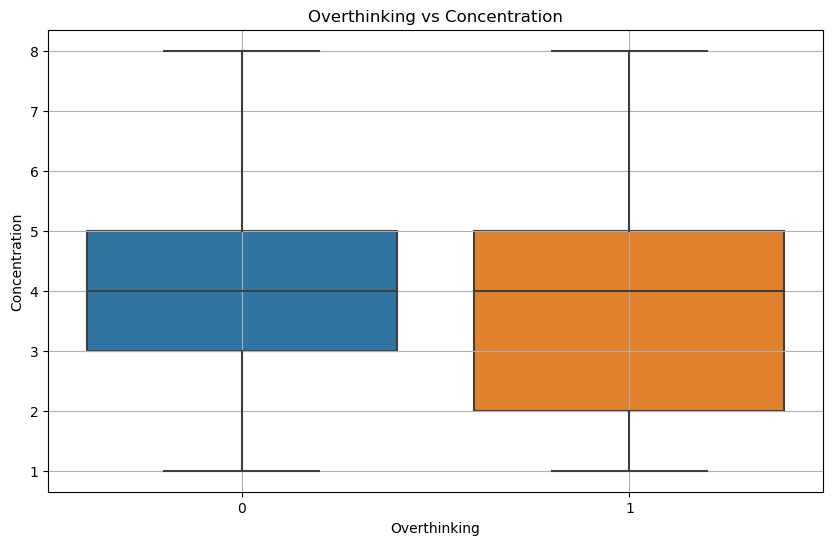

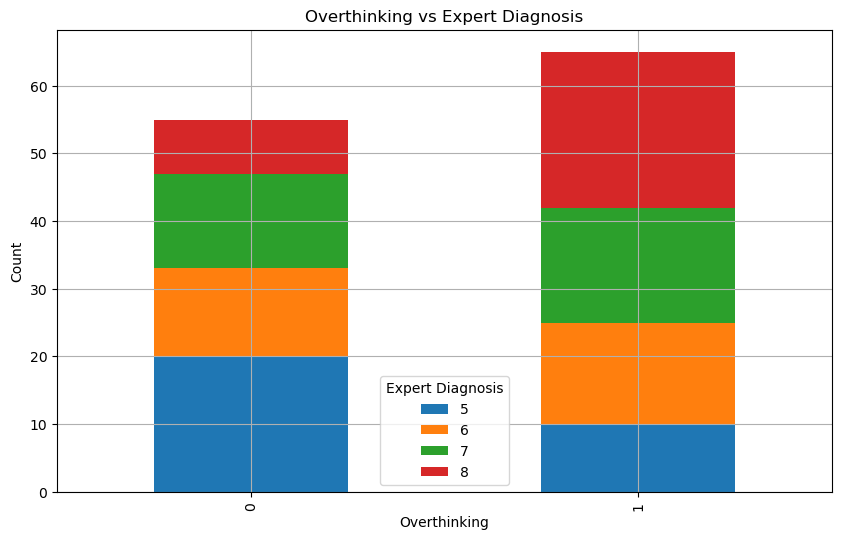

In [90]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Overthinking', y='Concentration', data=df)
plt.title('Overthinking vs Concentration')
plt.xlabel('Overthinking')
plt.ylabel('Concentration')
plt.grid(True)
plt.show()

expert_diagnosis_count = df.groupby(['Overthinking', 'Expert Diagnose']).size().unstack()
expert_diagnosis_count.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Overthinking vs Expert Diagnosis')
plt.xlabel('Overthinking')
plt.ylabel('Count')
plt.grid(True)
plt.legend(title='Expert Diagnosis')
plt.show()

Analysis: Higher levels of overthinking tend to be associated with lower concentration levels so when there's overthinking it results in low concentration levels.
for overthinking and mental health we can see that for normal people they tends to overthink less but there is a shift in expert diagnoses towards conditions like depression as overthinking levels increase and continues in other medical conditions too.
This indicates that overthinking may not only affect concentration negatively but could also be linked to mental health issues such as depression.

# Shahd's Questions

# 10.Are sleep disturbances and anorexia associated with suicidal thoughts, and nervous breakdowns?

exploring the potential relationship between sleep disturbances and three significant mental health factors:
suicidal thoughts, anorexia and nervous breakdowns. By examining whether there is an association between these variables,
researchers or healthcare professionals can gain insights into the interplay between sleep quality,anorexia, and mental health issues.
Understanding this correlation may help in identifying risk factors for suicidal ideation and the occurrence of nervous breakdowns.

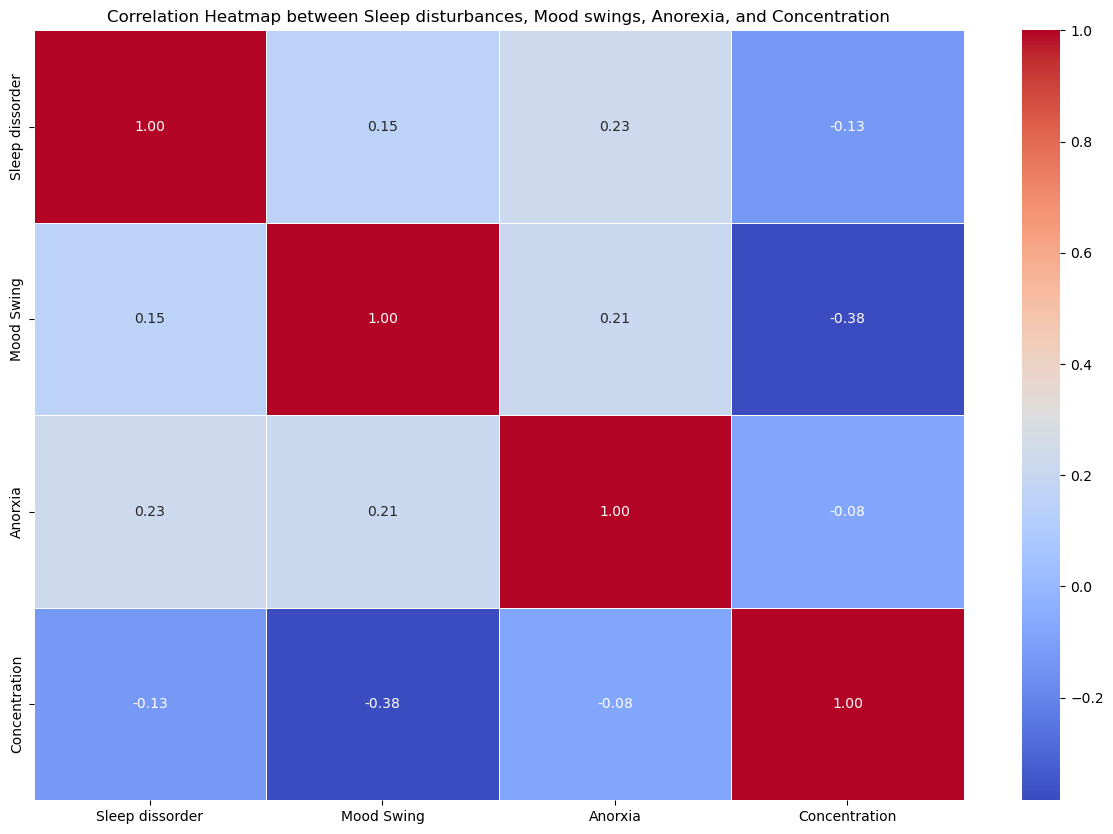

In [91]:
plt.figure(figsize=(15, 10))
join_matrix = df[['Sleep dissorder', 'Mood Swing', 'Anorxia', 'Concentration']].corr()
sns.heatmap(join_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap between Sleep disturbances, Mood swings, Anorexia, and Concentration')
plt.show()


Anorexia: anorexia has a positive correlation with sleep disorder with cofficient 0.23 (weak positive correlation)
Individuals experiencing sleep disturbances may also be more likely to exhibit anorexic behaviors.
However, the strength of this correlation is relatively low, indicating that other factors may also contribute to the presence of anorexia.

Mood swings: There is a positive correlation between sleep disturbances and mood swings with cofficient 0.15.
As sleep disturbances increase, mood swings tend to increase as well.

Concentration:There is a negative correlation between sleep disturbances and concentrationwith cofficient -0.13.
As sleep disturbances increase, concentration tends to decrease.

Overall sleep disturbances may have some association with anorexia, mood swings, and concentration, but the correlations are not very strong. Other factors beyond sleep disturbances likely play a role in the presence of these symptoms, and further investigation may be needed to understand the complex relationship between these variables.

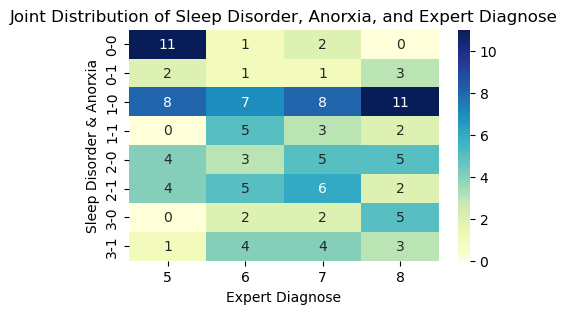

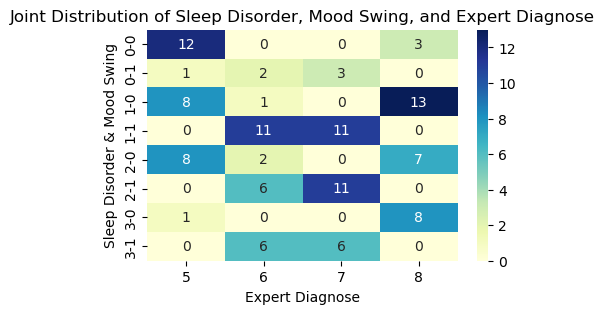

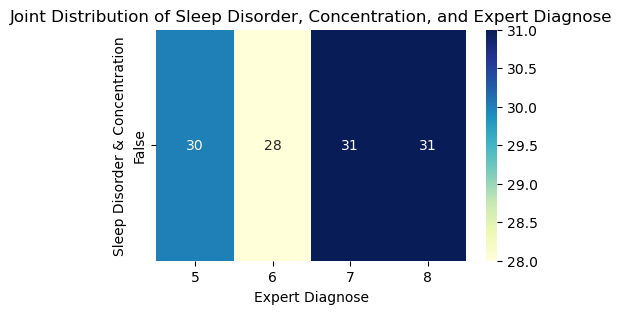

In [92]:
join_data = pd.crosstab(index=[df['Sleep dissorder'], df['Anorxia']], columns=df['Expert Diagnose'])

# Plot heatmap
plt.figure(figsize=(5, 3))
sns.heatmap(join_data, annot=True, cmap="YlGnBu", fmt="d")
plt.title('Joint Distribution of Sleep Disorder, Anorxia, and Expert Diagnose')
plt.xlabel('Expert Diagnose')
plt.ylabel('Sleep Disorder & Anorxia')
plt.show()

join_data = pd.crosstab(index=[df['Sleep dissorder'], df['Mood Swing']], columns=df['Expert Diagnose'])

# Plot heatmap
plt.figure(figsize=(5, 3))
sns.heatmap(join_data, annot=True, cmap="YlGnBu", fmt="d")
plt.title('Joint Distribution of Sleep Disorder, Mood Swing, and Expert Diagnose')
plt.xlabel('Expert Diagnose')
plt.ylabel('Sleep Disorder & Mood Swing')
plt.show()

cross_tab = pd.crosstab(index=[(df['Sleep dissorder'] == 1) & (df['Concentration'] == 0)],  columns=df['Expert Diagnose'])

# Plot heatmap
plt.figure(figsize=(5, 3))
sns.heatmap(cross_tab, annot=True, cmap="YlGnBu", fmt="d")
plt.title('Joint Distribution of Sleep Disorder, Concentration, and Expert Diagnose')
plt.xlabel('Expert Diagnose')
plt.ylabel('Sleep Disorder & Concentration')
plt.show()

# 11.Do professionals wrongly classify patients who tend to ignore their problems and move on as normal?

To assess whether there may be instances where professionals misclassify patients who express a desire to ignore their problems 
and move on as "normal." By exploring this possibility, the aim is to understand whether certain coping mechanisms or attitudes
toward problems might lead professionals to overlook underlying mental health issues in individuals.

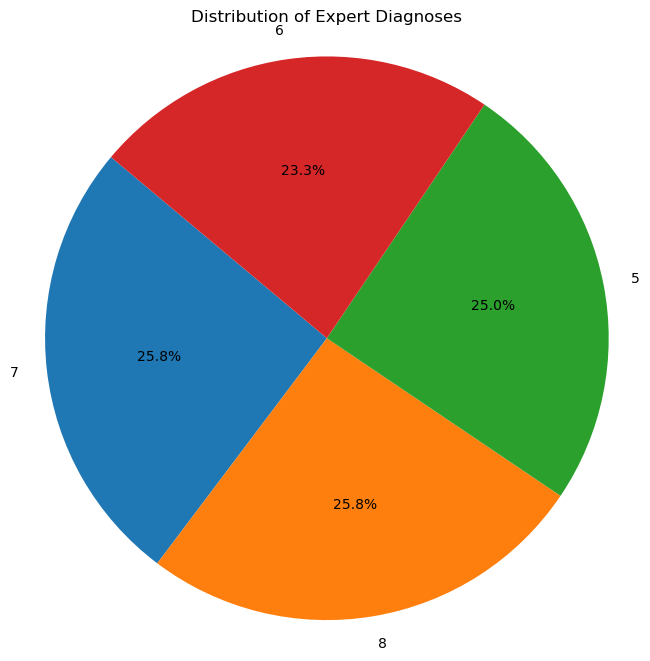

In [93]:
diagnosis_counts = df['Expert Diagnose'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(diagnosis_counts, labels=diagnosis_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Expert Diagnoses')
plt.axis('equal')  
plt.show()

<Figure size 1000x600 with 0 Axes>

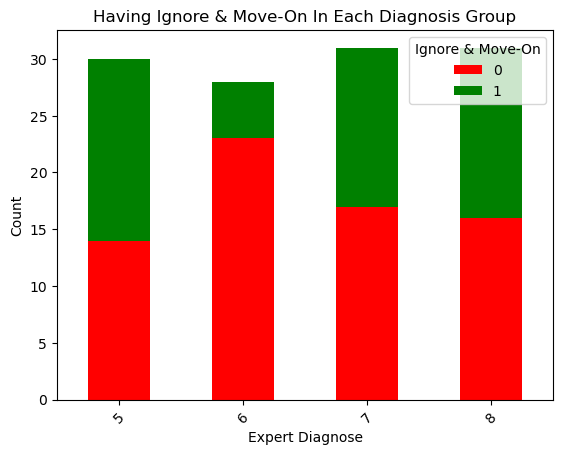

In [94]:
counts = df.groupby("Expert Diagnose")["Ignore & Move-On"].value_counts().unstack(fill_value=0)
plt.figure(figsize=(10, 6))
counts.plot(kind="bar", stacked=True, color=["red", "green"])
plt.title("Having Ignore & Move-On In Each Diagnosis Group")
plt.xlabel("Expert Diagnose")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Ignore & Move-On", loc="upper right")
plt.show()

The highest count of patients with the “Ignore & Move-On” trait is observed in the ‘Normal’ diagnosis group (Expert Diagnose = 5).

The ‘Bipolar Type-1’ diagnosis group (Expert Diagnose = 6) has the lowest count of patients with the “Ignore & Move-On” trait.

Overall, there is no clear pattern suggesting that professionals consistently classify patients who tend to ignore their problems and move on as normal. But since normal patients tend to ignore and move on more there can be a small percentage that they were wrongly classified.

# 12.Do patients who experience “Overthinking” and “Nervous Breakdowns” also tend to exhibit “suicidal thoughts”?	

To investigate potential correlations between these three symptoms. By exploring whether there is a relationship between 
overthinking, nervous breakdowns, and suicidal thoughts,the question seeks to understand if individuals who exhibit symptoms
of overthinking and nervous breakdowns arealso more likely to experience suicidal ideation. 
This could prevent suicide cases by finding out if thereis an interconnectedness of these mental health issues 
and aid in the development of targeted interventions or support strategies for individuals dealing with these challenges.

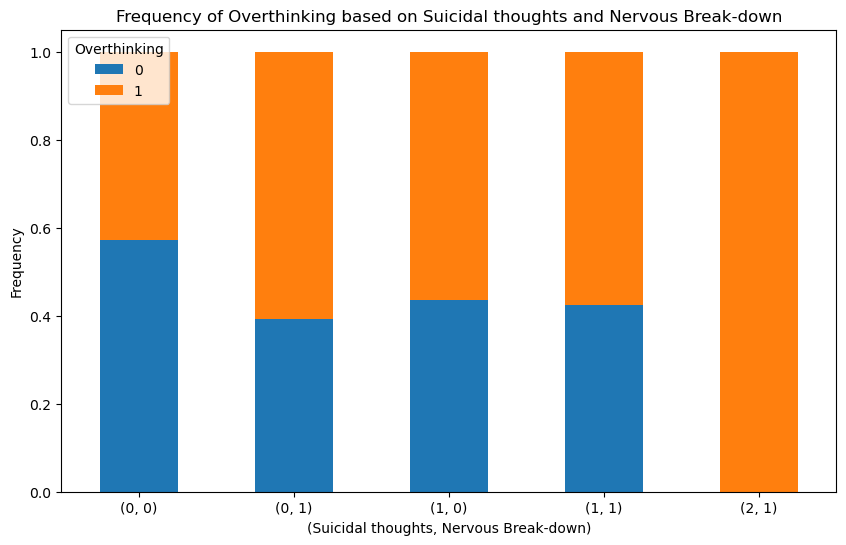

In [95]:
grouped_data = df.groupby(['Suicidal thoughts', 'Nervous Break-down'])['Overthinking'].value_counts(normalize=True).unstack()
grouped_data.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Frequency of Overthinking based on Suicidal thoughts and Nervous Break-down')
plt.xlabel('(Suicidal thoughts, Nervous Break-down)')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.legend(title='Overthinking', loc='upper left')
plt.show()


The relationship between Overthinking, Suicidal Thoughts and Nervous Breakdowns
Overthinking and Nervous Breakdowns:
There is a positive correlation between overthinking and nervous breakdowns.
As overthinking increases, the chance of experiencing nervous breakdowns also increases.

Suicidal Thoughts:
Suicidal thoughts are associated with both overthinking and nervous breakdowns.
Individuals with high levels of overthinking and nervous breakdowns are more likely to have some level of suicidal thoughts.

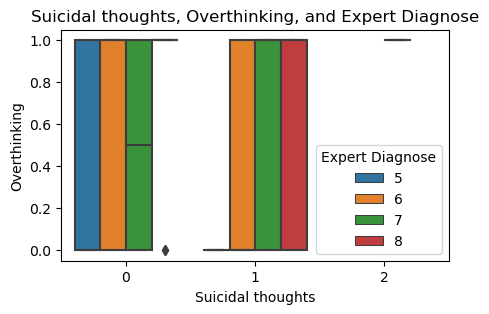

In [96]:
plt.figure(figsize=(5, 3))
sns.boxplot(x='Suicidal thoughts', y='Overthinking', data=df,hue = 'Expert Diagnose')
plt.title('Suicidal thoughts, Overthinking, and Expert Diagnose')
plt.show()



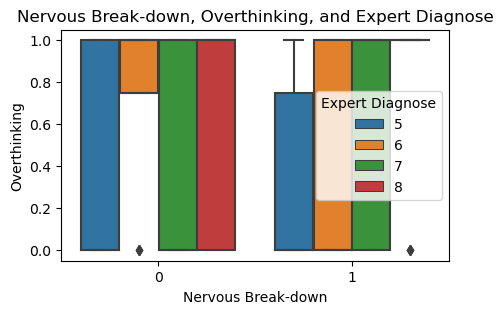

In [97]:
plt.figure(figsize=(5, 3))
sns.boxplot(x='Nervous Break-down', y='Overthinking', data=df,hue = 'Expert Diagnose')
plt.title('Nervous Break-down, Overthinking, and Expert Diagnose')
plt.show()
